In [1]:
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt

In [2]:
from figures import JobTimePlots

In [60]:
%load_ext autoreload
%autoreload 2

# Read Simulation Time Data

In [35]:
sim_out_data = pandas.read_csv("/home/kenenbek/github-cloned/TRACE_AND_OUT/out.txt")
sim_out_data.columns = [i.replace(" ", "") for i in sim_out_data.columns]
sim_out_data.head()

JobName  Success  Timestart  timeschedule  TimestartExec  TimeEndExec  \
0  153455147        1          0      0.010325       0.010433     2.480433   
1  153463406        1          0      0.012915       0.012925     8.592925   
2  153447513        1          0      0.010325       0.010433    16.360433   
3  153443314        1          0      0.012936       0.012947    17.482946   
4  153439411        1          0      0.011161       0.011172    18.771172   

          Tier          Type  
0  UK-ScotGrid  MCSimulation  
1     RAL-LCG2  MCSimulation  
2  UK-ScotGrid  MCSimulation  
3          pic  MCSimulation  
4    NRC-KI-T1  MCSimulation

# Read Real Time Data

In [36]:
real_out_data = pandas.read_csv('/home/kenenbek/github-cloned/TRACE_AND_OUT/real_out.txt')
is_not_none = (real_out_data.values != 'None').cumprod(axis=1)[:, -1]
real_out_data = real_out_data.iloc[is_not_none == 1]
real_out_data.head()

JobName  SubmissionTime  StartExecTime  EndExecTime  WallClockTime  \
0  153438277               0          34944       110848   75827.929688   
1  153438278               0          33664        71296   37693.242188   
2  153438279               0          35200       114176   79040.226562   
3  153438281               0          33152       100096   66917.937500   
4  153438286               0          32128        83328   51132.632812   

   TotalCPUTime       JobType           Tier  
0  75310.257812  MCSimulation   UK-NorthGrid  
1  37466.828125  MCSimulation  PL-TIER2-WLCG  
2  78950.757812  MCSimulation  NIKHEF-ELPROD  
3  66831.406250  MCSimulation       FZK-LCG2  
4  50973.179688  MCSimulation   UK-NorthGrid

# Job Time Plots

In [61]:
jtp = JobTimePlots(sim_out_data, real_out_data)

### Job Submission Time Plot

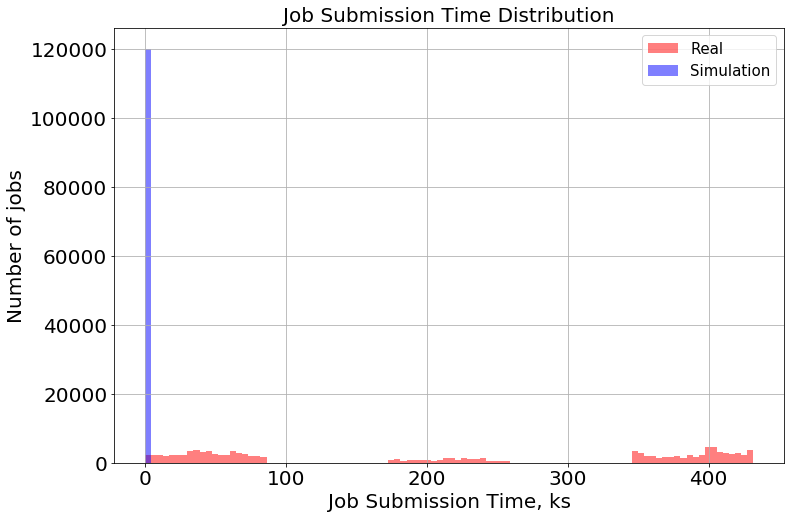

In [6]:
jtp.job_submission_time()

figures.py:50: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if sim_object_names == None or real_object_names == None:


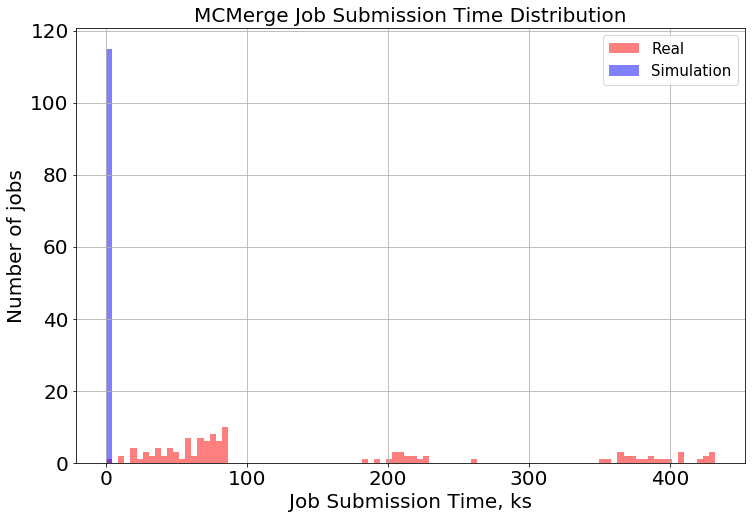

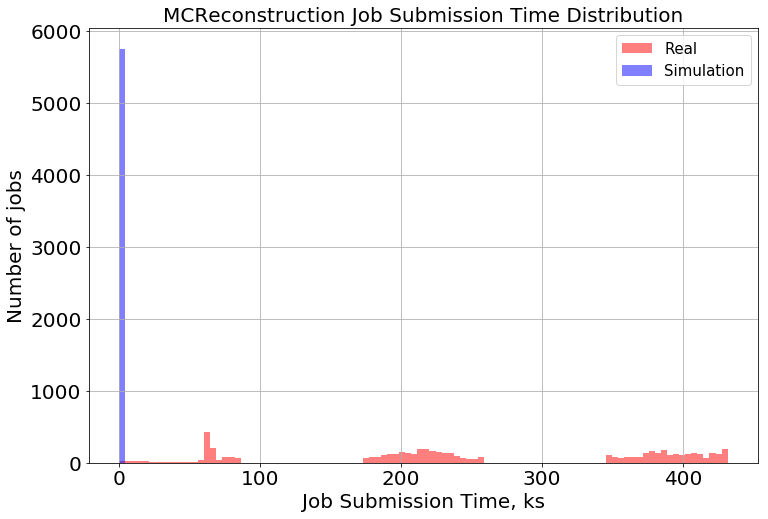

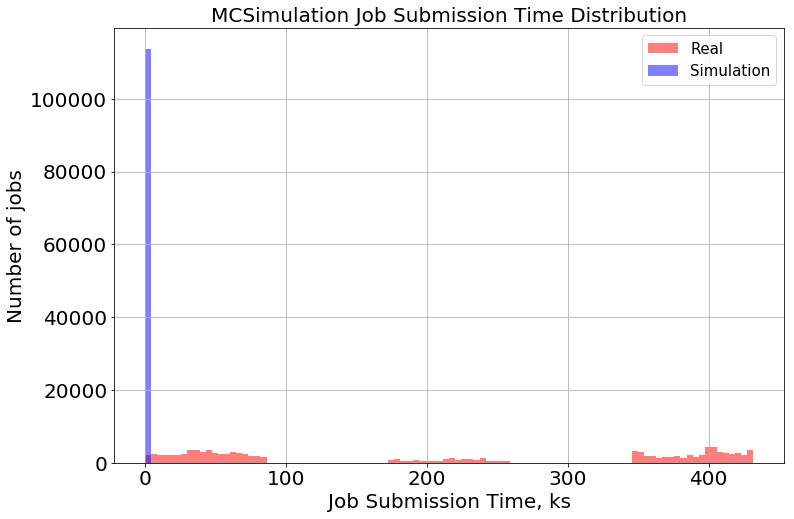

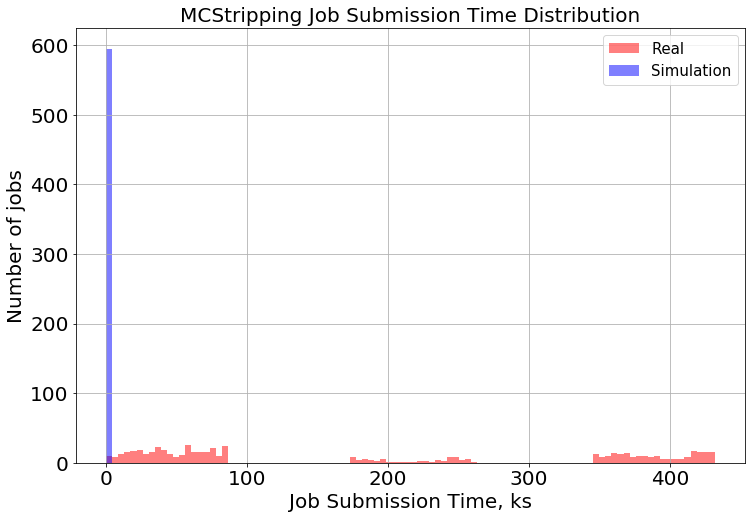

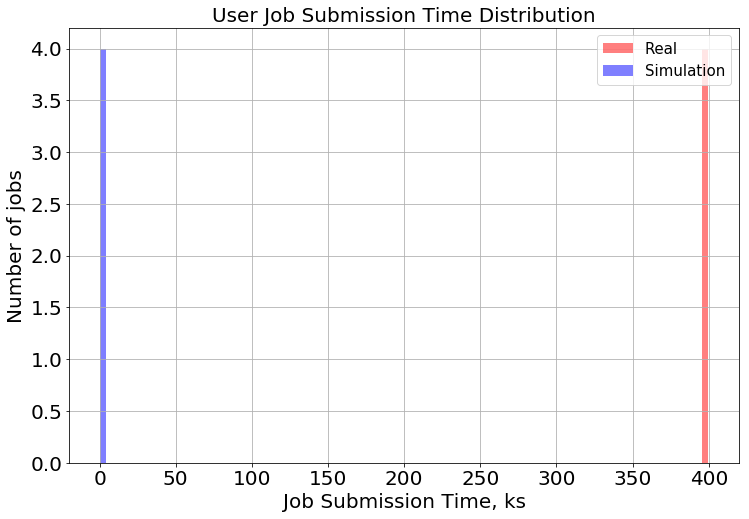

In [7]:
jtp.job_submission_time(by_job_type=True)

### Job Start Execution Time Plot

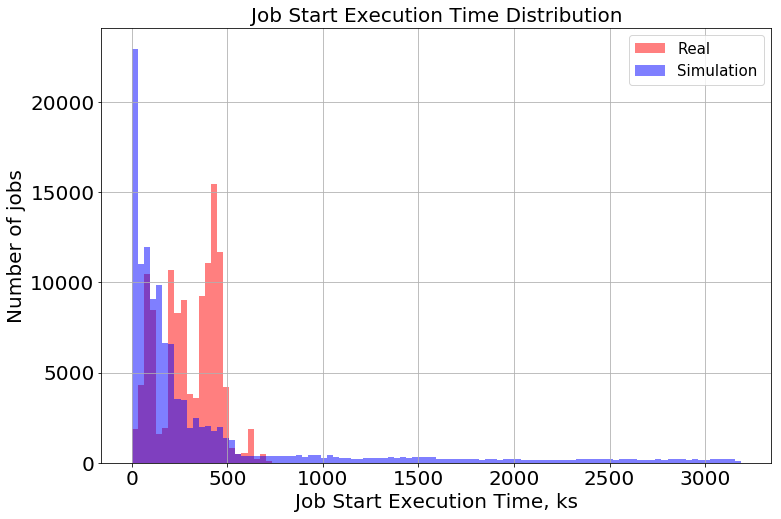

In [8]:
jtp.job_start_exec_time()

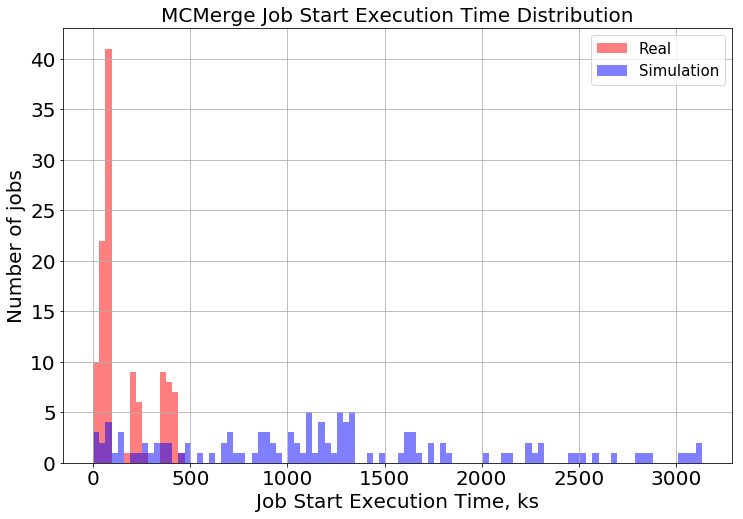

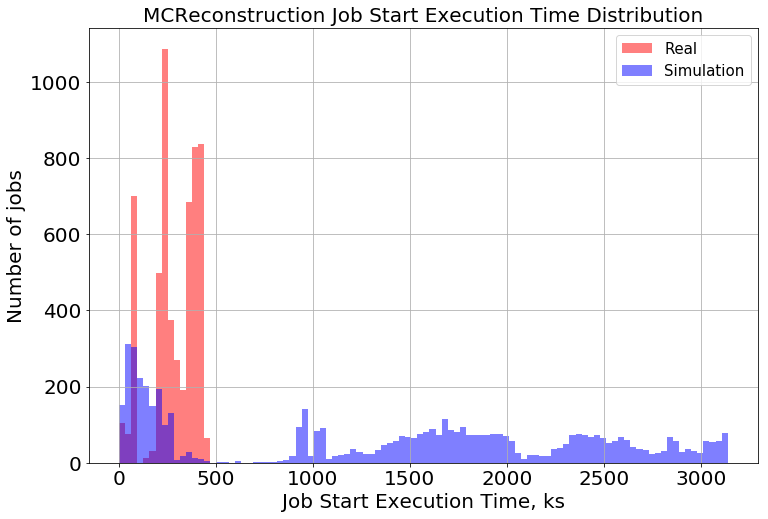

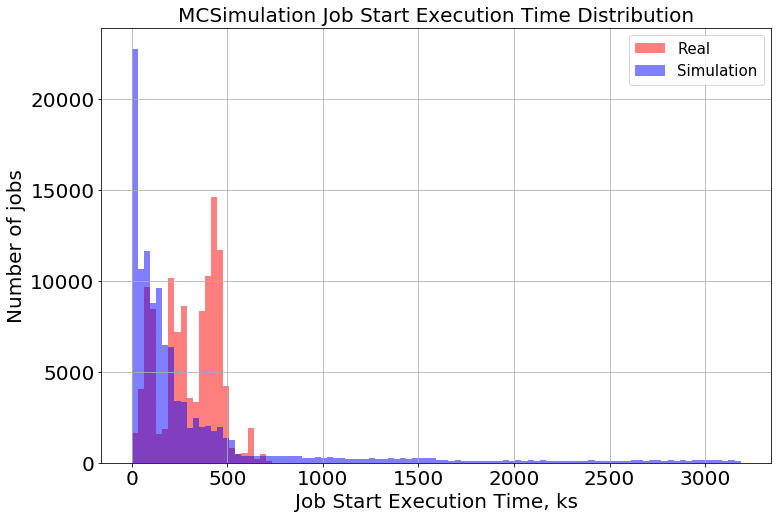

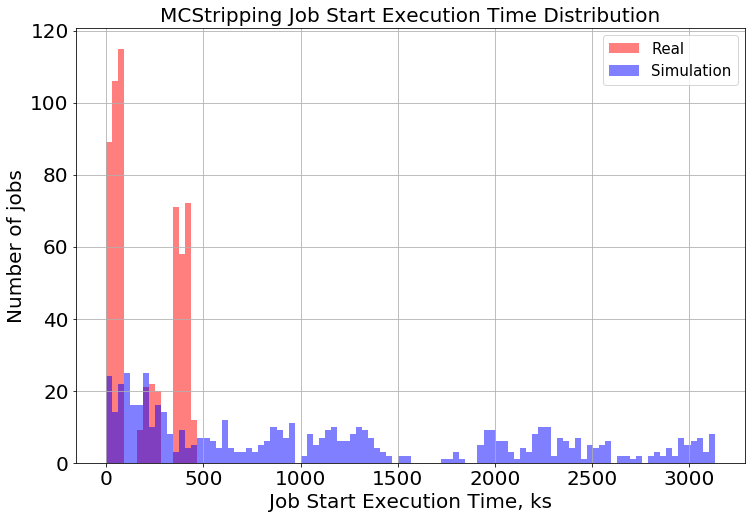

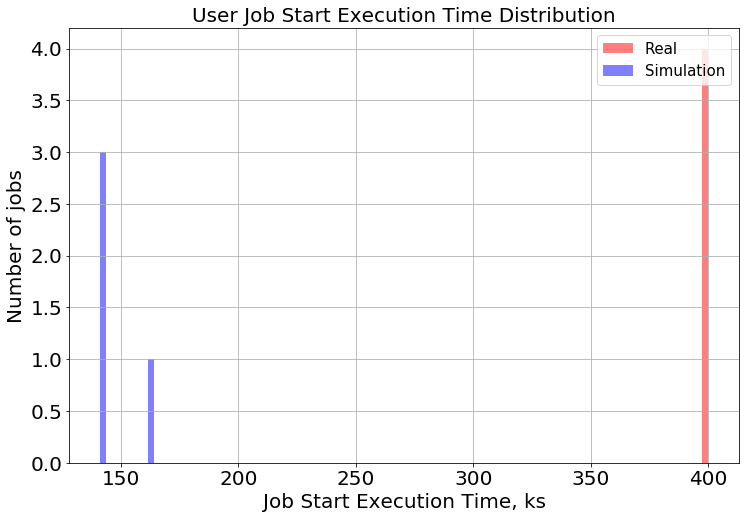

In [9]:
jtp.job_start_exec_time(by_job_type=True)

### Job End Execution Time Plot

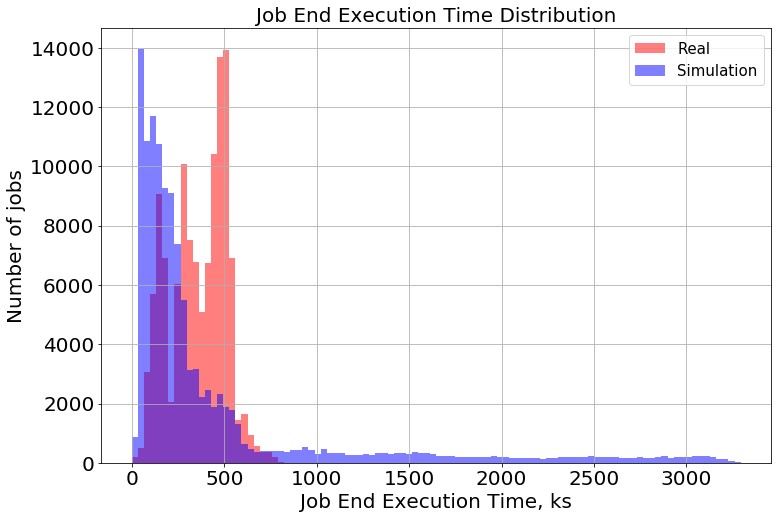

In [10]:
jtp.job_end_exec_time()

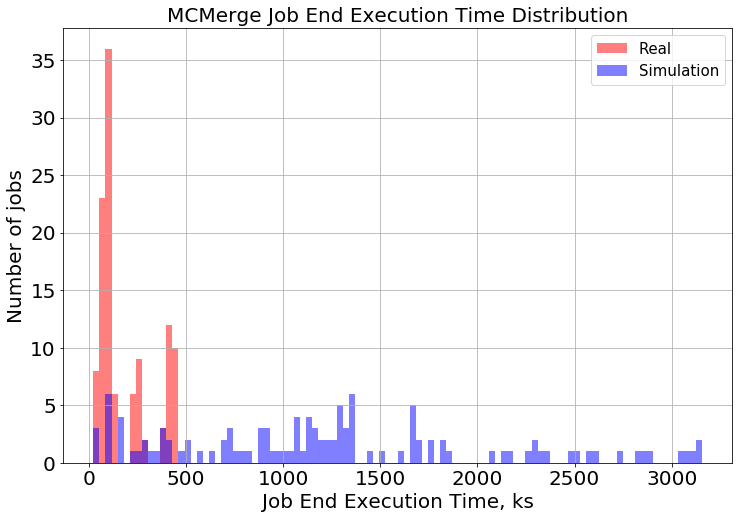

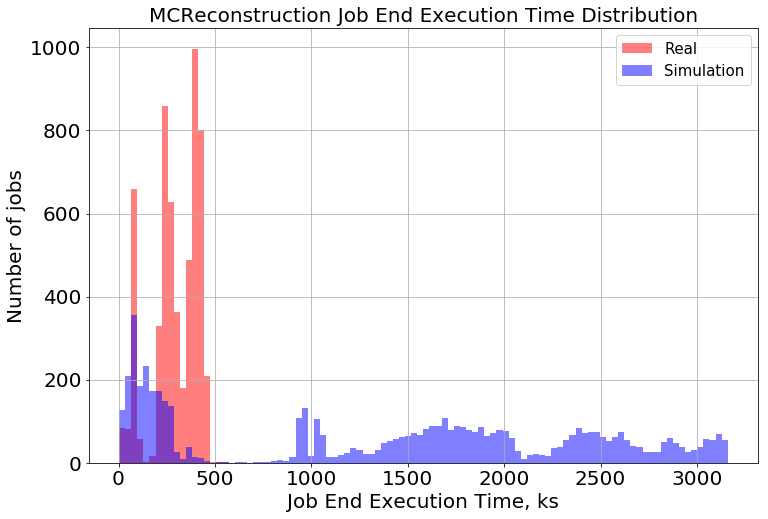

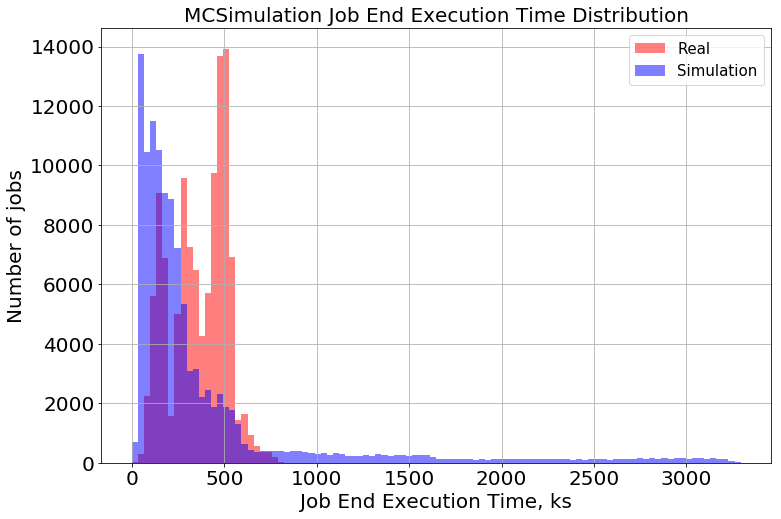

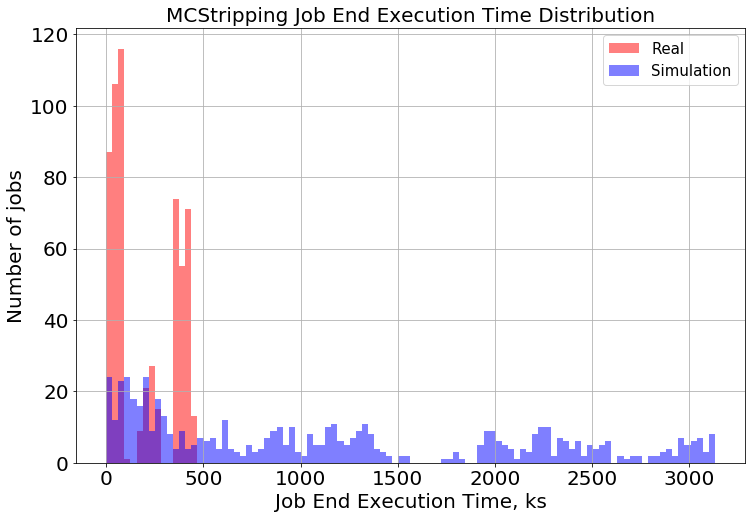

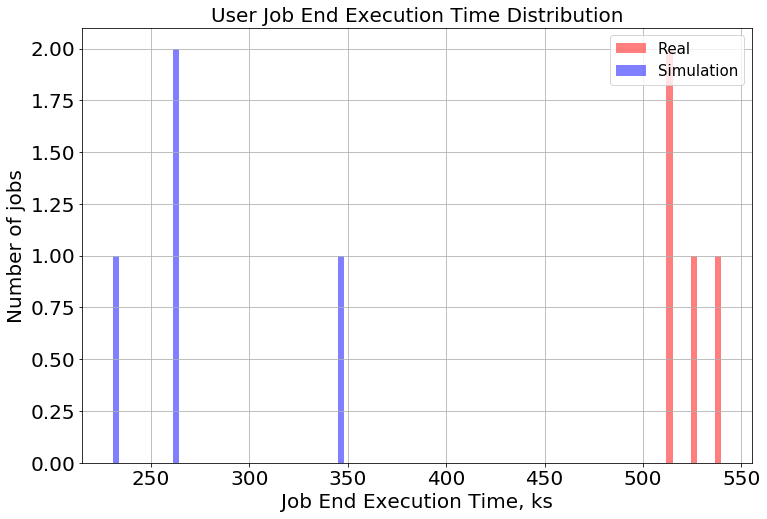

In [11]:
jtp.job_end_exec_time(by_job_type=True)

### Job CPU Time Plot

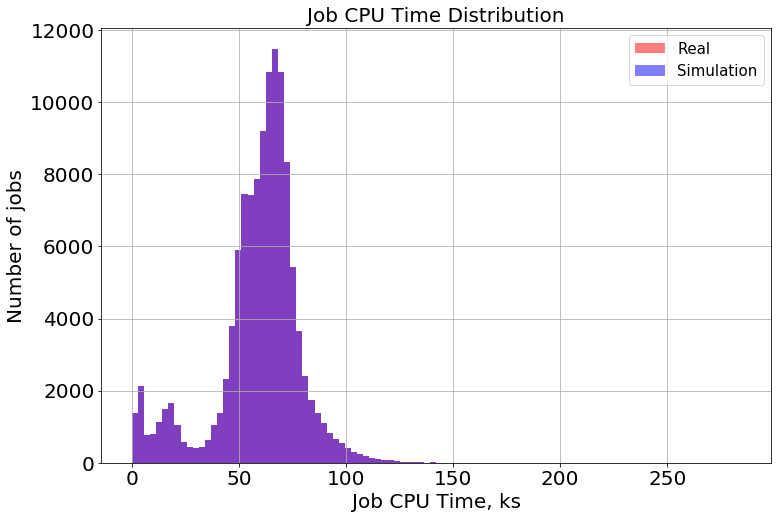

In [14]:
jtp.job_cpu_time()

### Job Execution Time Plots
Job execution time = job end execution time - job start execution time

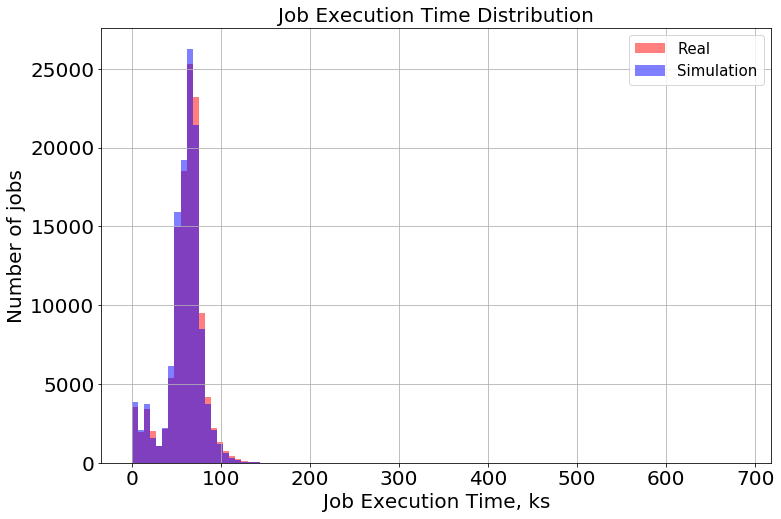

In [58]:
jtp.job_exec_time()

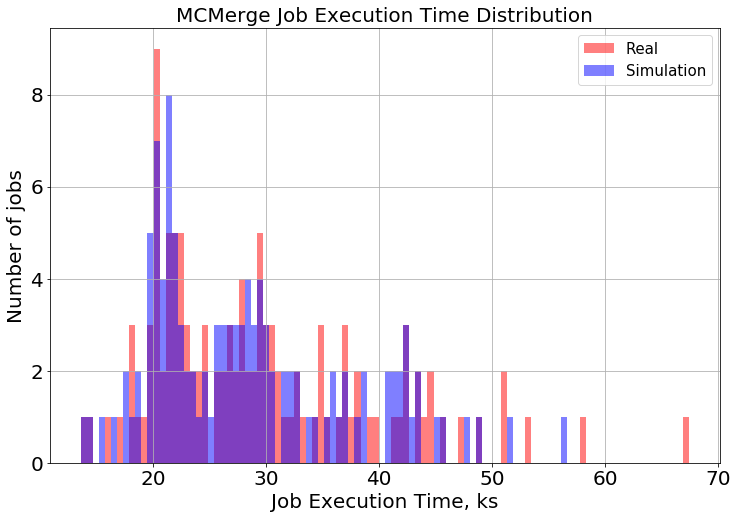

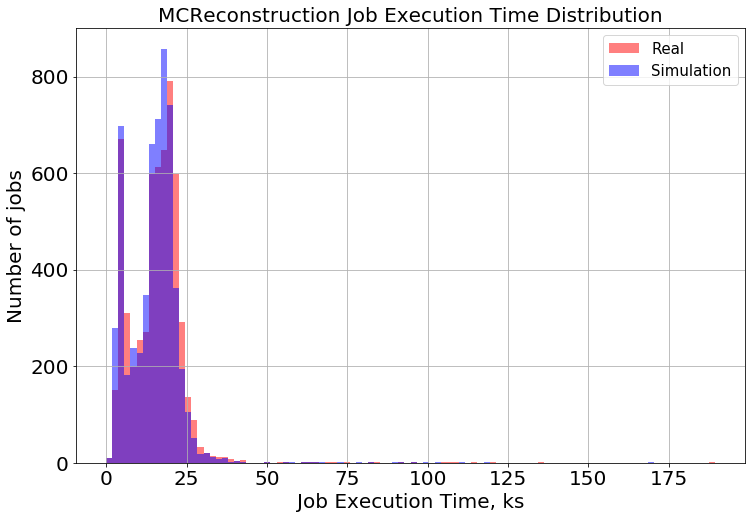

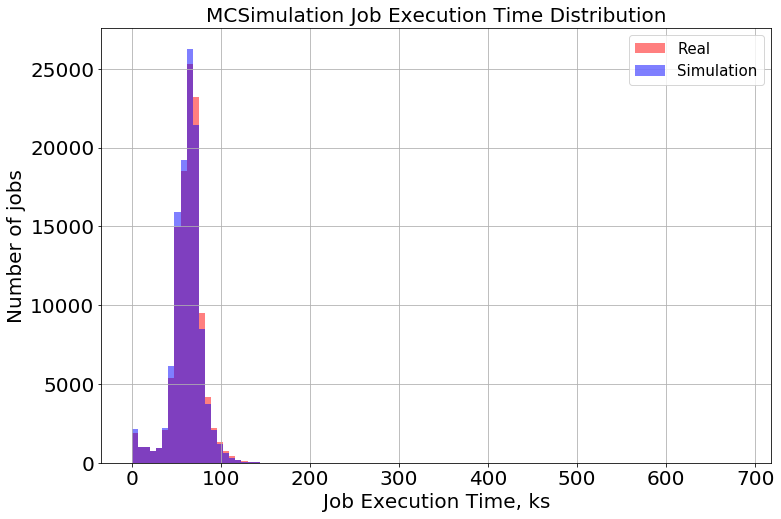

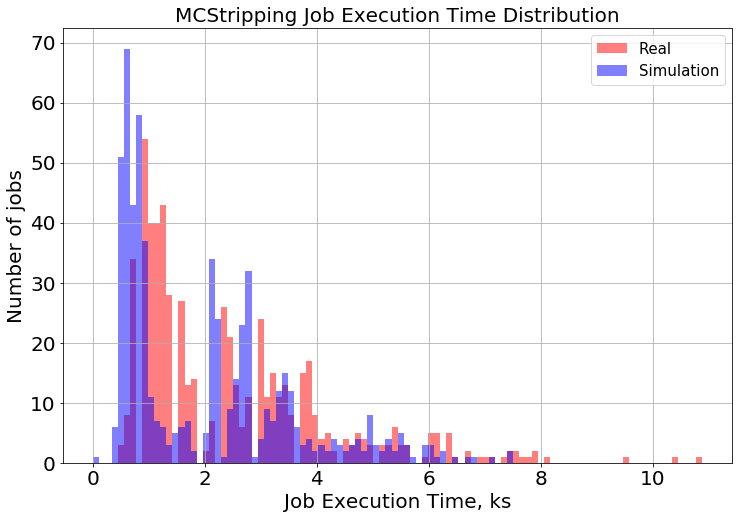

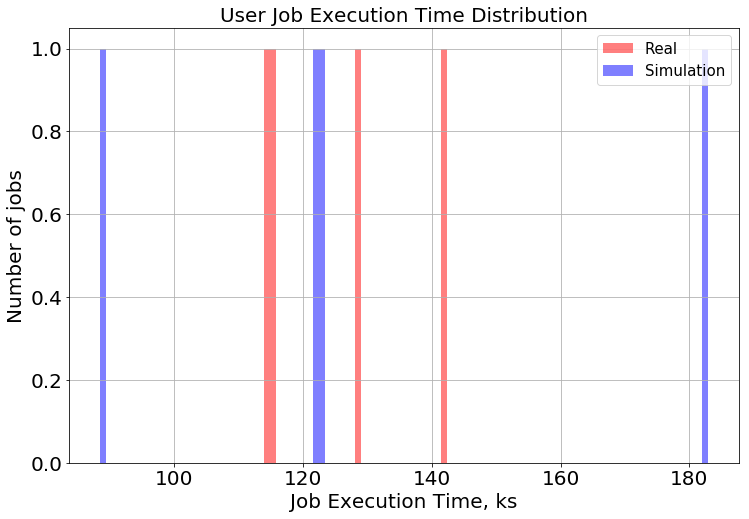

In [16]:
jtp.job_exec_time(by_job_type=True)

### Job Wait Time Plots
Job wait time = job start execution time - job submission time

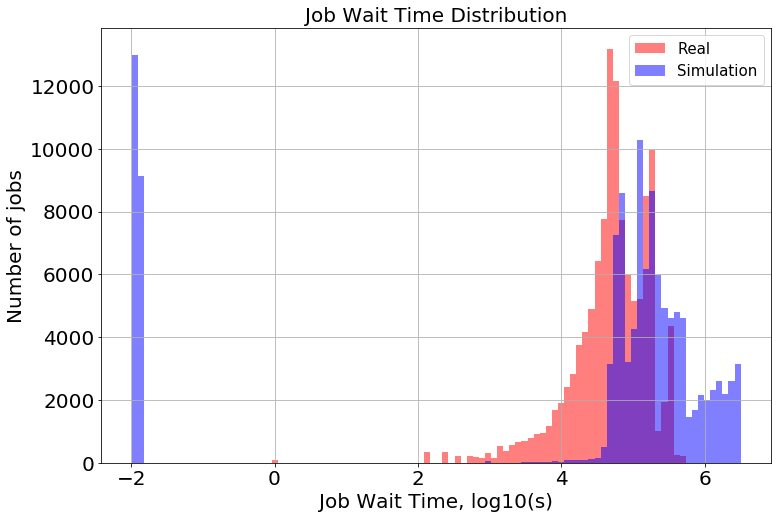

In [65]:
jtp.job_wait_time()

figures.py:50: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if sim_object_names == None or real_object_names == None:


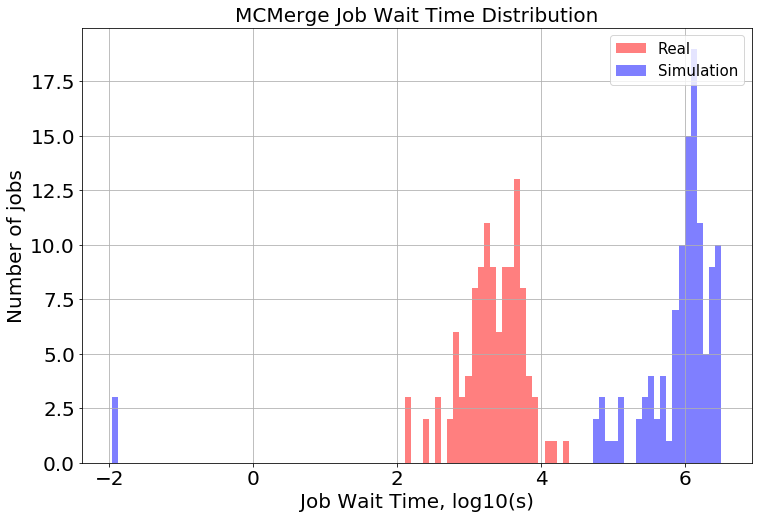

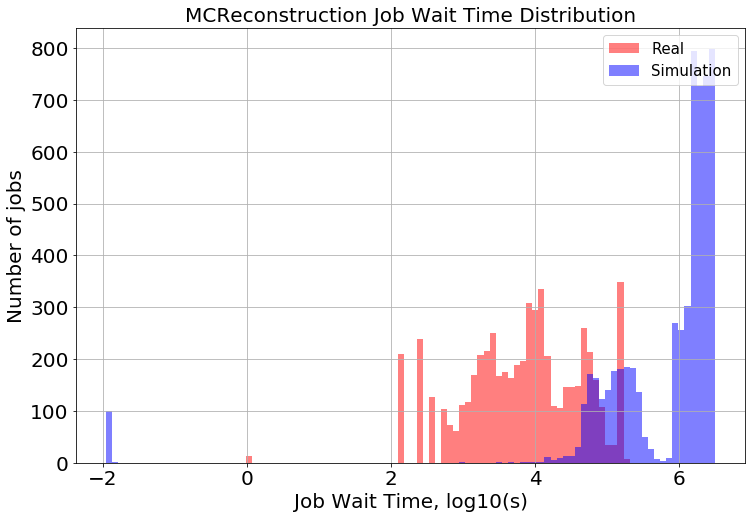

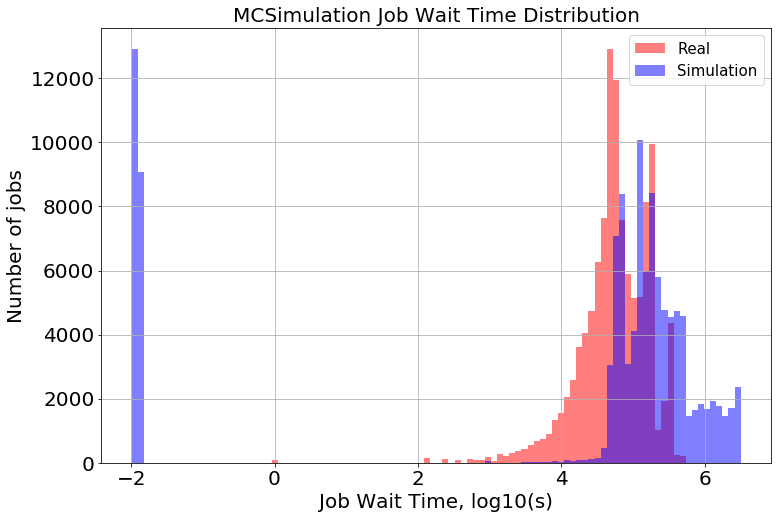

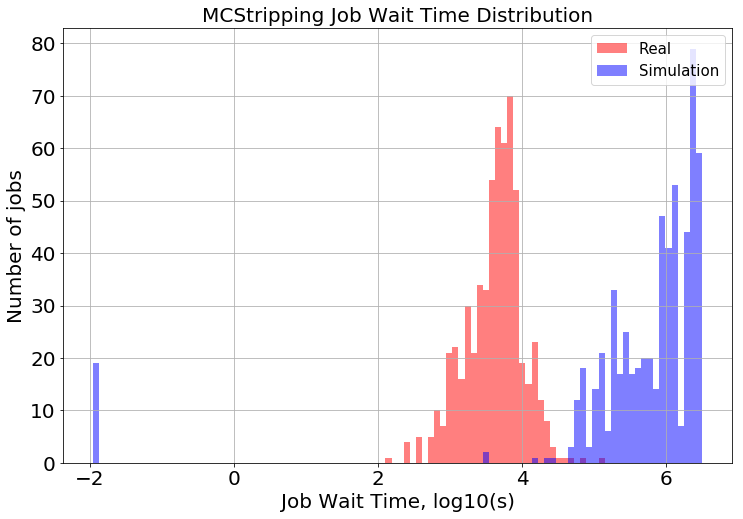

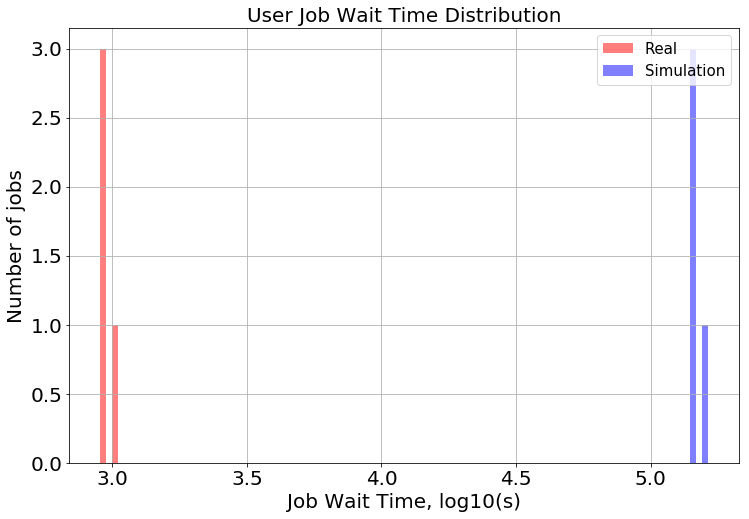

In [66]:
jtp.job_wait_time(by_job_type=True)

### Job Life Time Plots
Job life time = job end execution time - job submission time

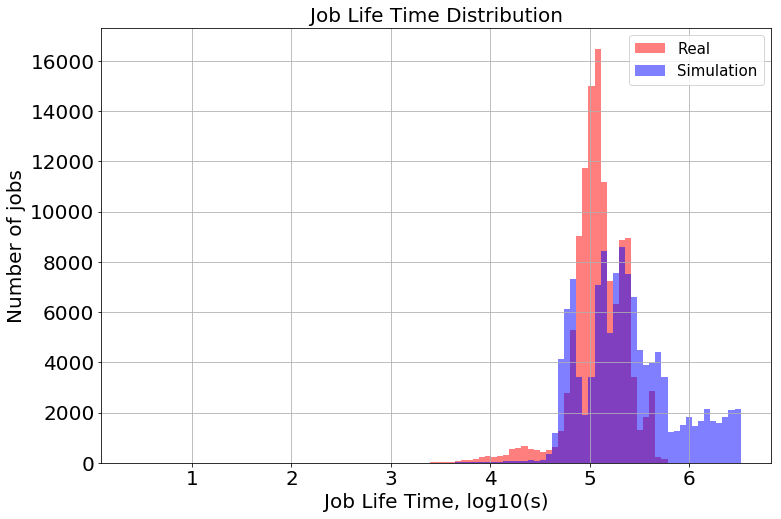

In [21]:
jtp.job_life_time()

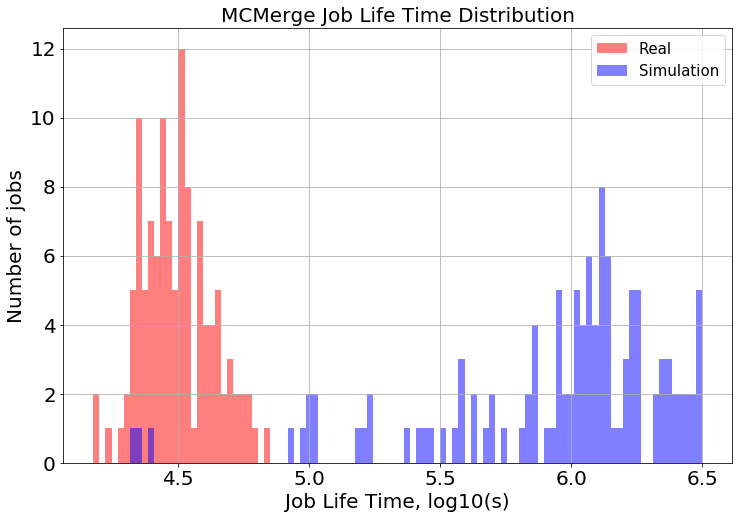

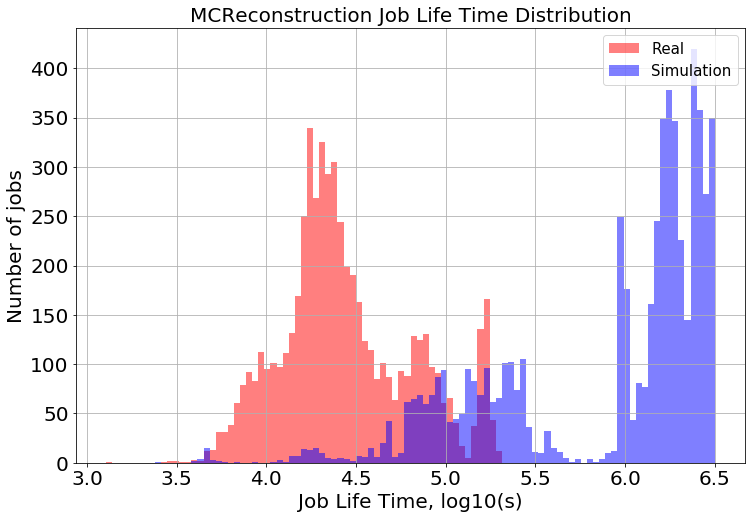

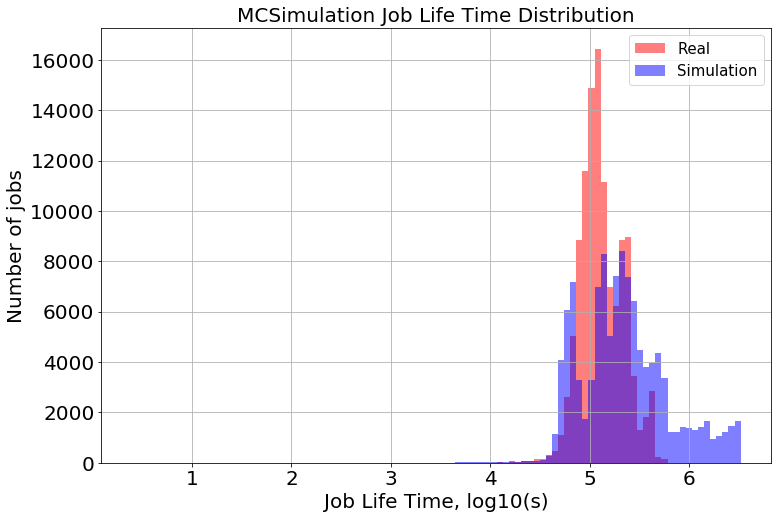

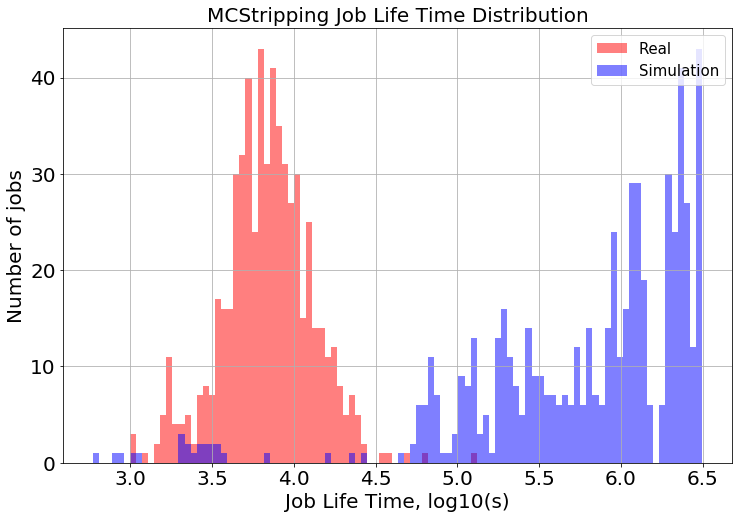

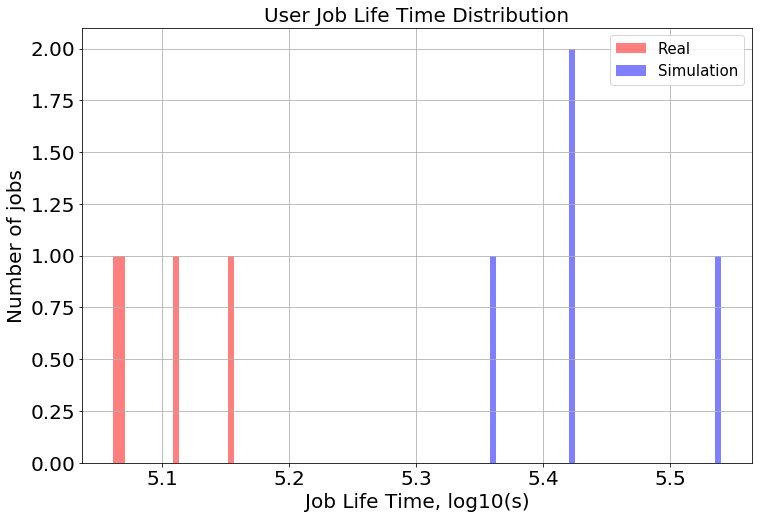

In [22]:
jtp.job_life_time(by_job_type=True)

# Read Simulation Trace Data

In [24]:
sim_trace_data = pandas.read_csv("/home/kenenbek/github-cloned/TRACE_AND_OUT/trace.csv", header=None, sep=', ')
sim_trace_data.columns = ['Nothing', 'Object', 'Variable', 'StartObservTime', 'EndObservTime', 'ObservTime', 'VarValue']
sim_trace_data.head(5)

/home/kenenbek/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Nothing      Object            Variable  StartObservTime  EndObservTime  \
0  Variable  3-Tier2_16           bandwidth              0.0   3.292855e+06   
1  Variable  3-Tier2_16             latency              0.0   3.292855e+06   
2  Variable  3-Tier2_16             traffic              0.0   3.292855e+06   
3  Variable  3-Tier2_16    directUserAmount              0.0   3.292855e+06   
4  Variable  3-Tier2_16  indirectUserAmount              0.0   3.292855e+06   

     ObservTime      VarValue  
0  3.292855e+06  1.000000e+09  
1  3.292855e+06  0.000000e+00  
2  3.292855e+06  0.000000e+00  
3  3.292855e+06  0.000000e+00  
4  3.292855e+06  0.000000e+00

# Traffic Plots

In [71]:
from figures import TrafficPlots
tp = TrafficPlots(sim_trace_data)

### LHCOPN Data Transfer Plots

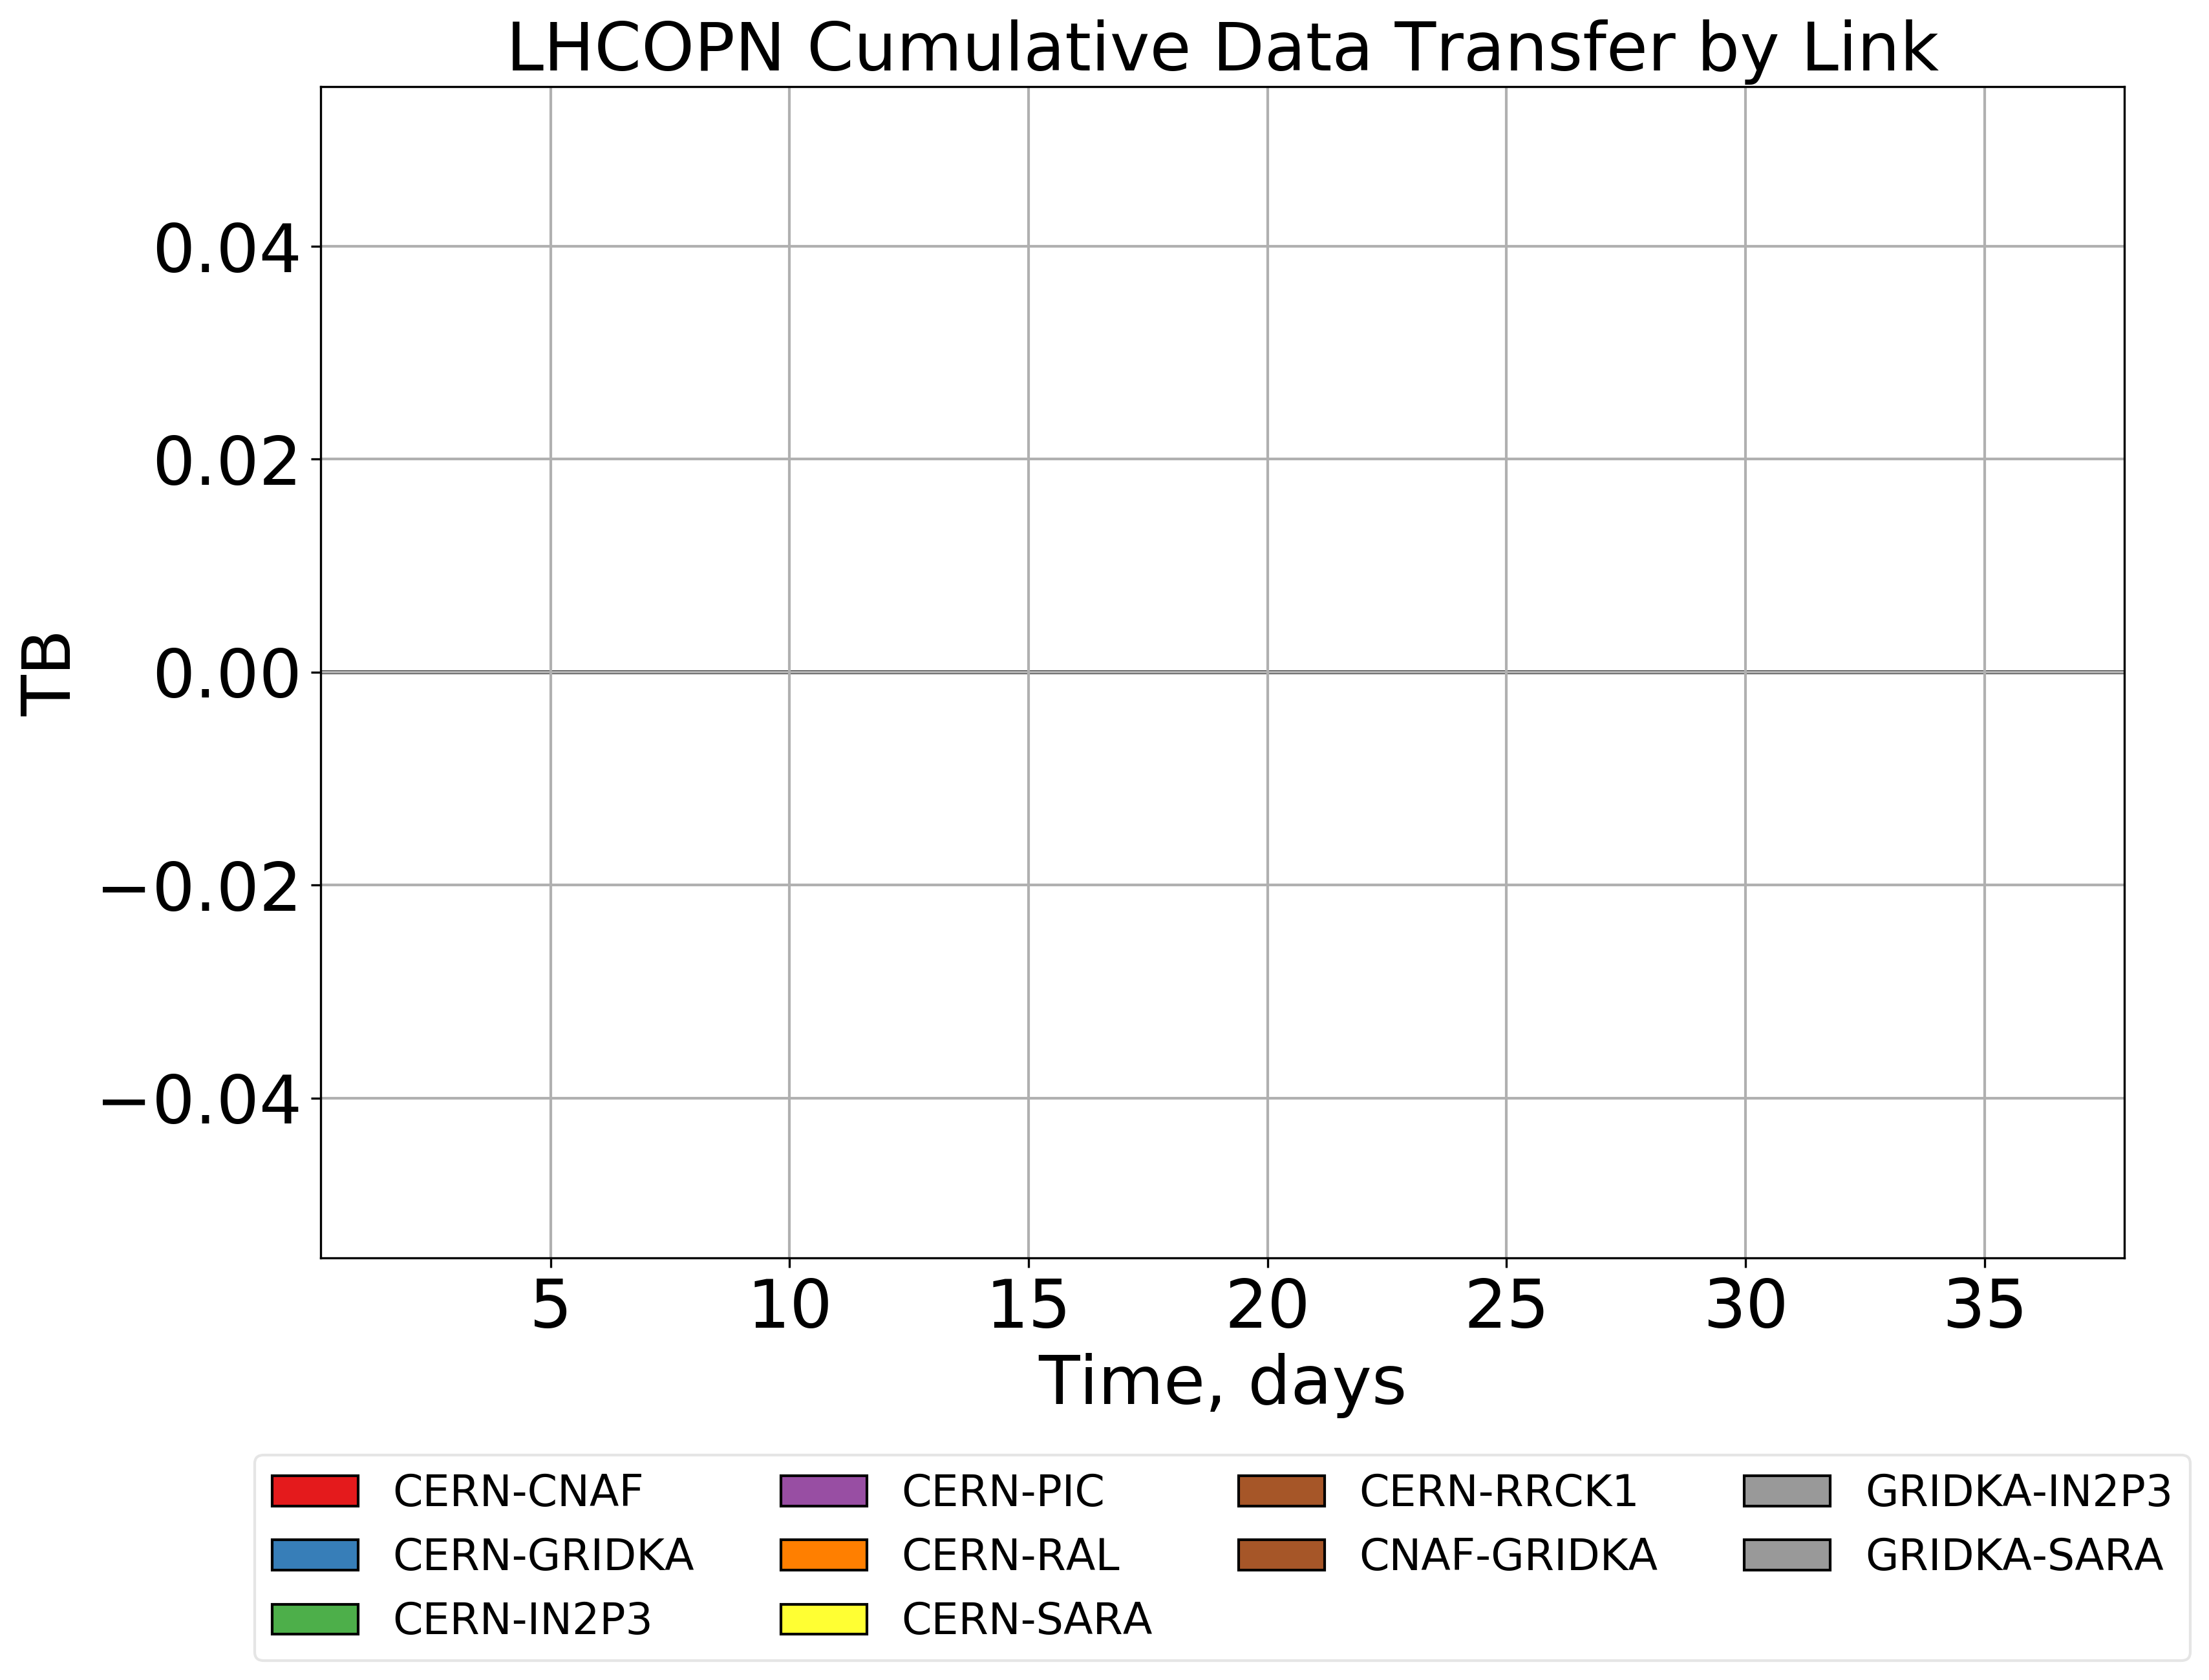

In [92]:
tp.lhcopn_cumulative_data_transfer()

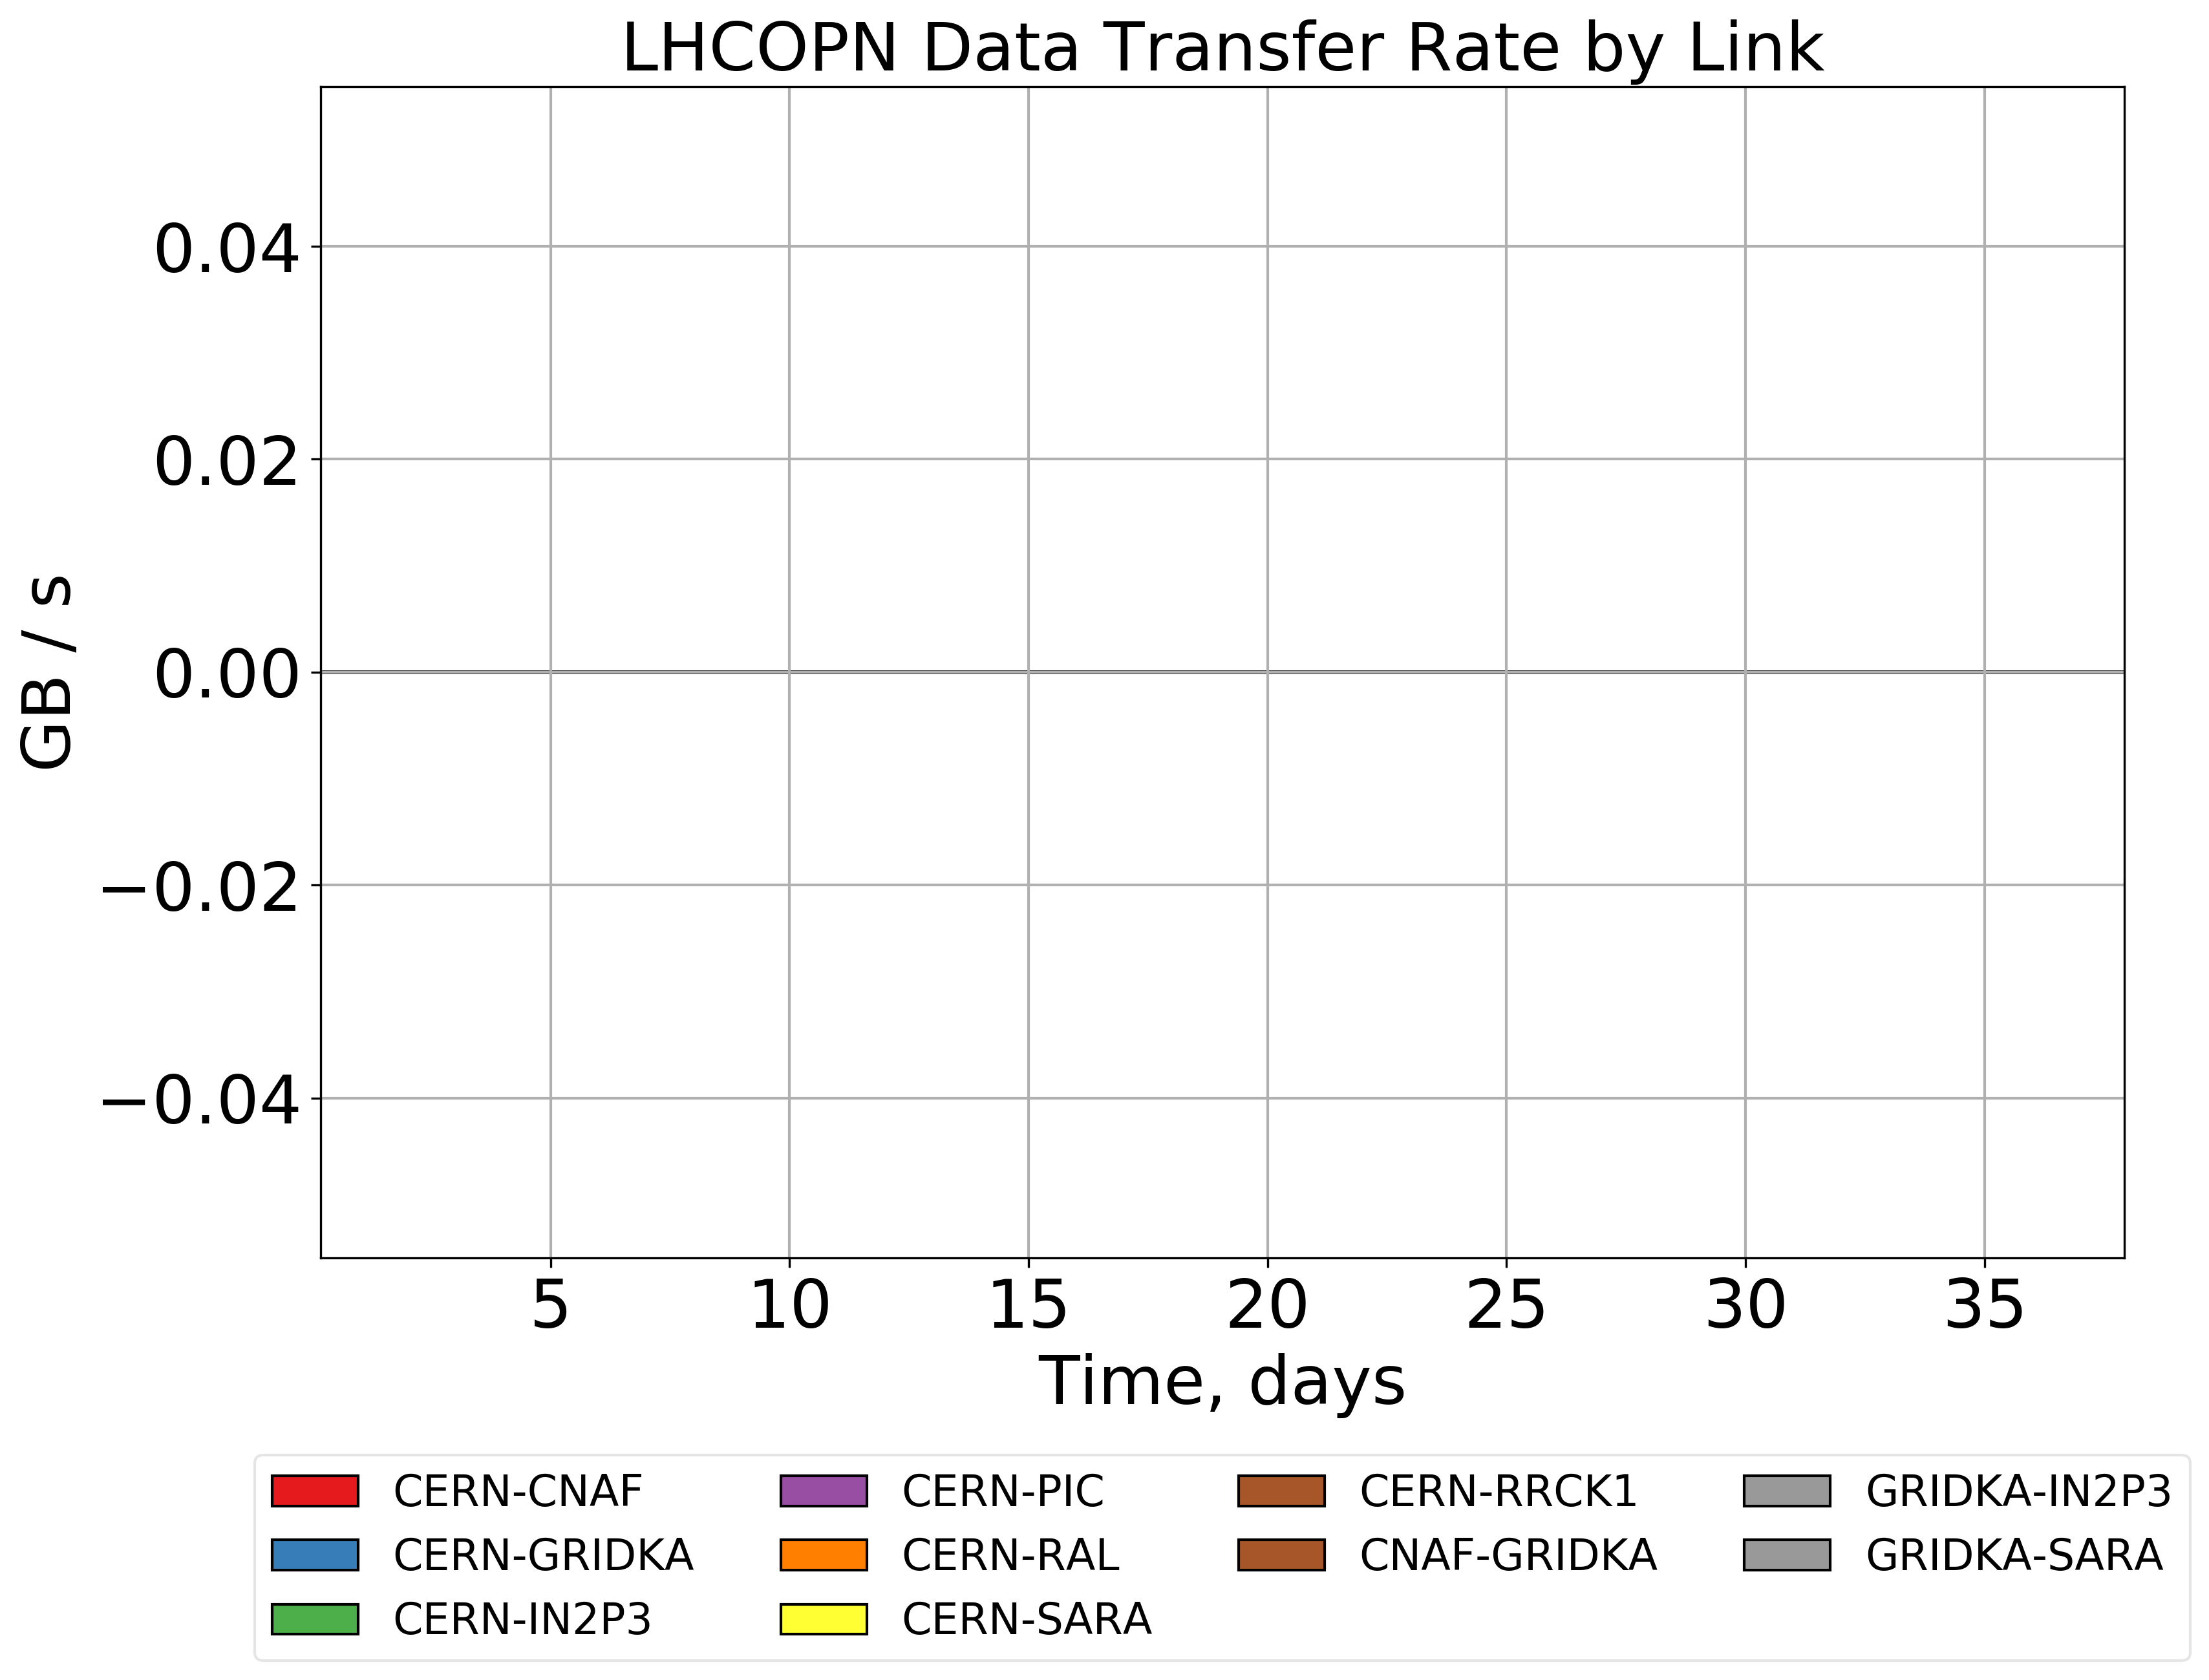

In [28]:
tp.lhcopn_data_transfer_rate()

# Input/Output Data Transfer Plots

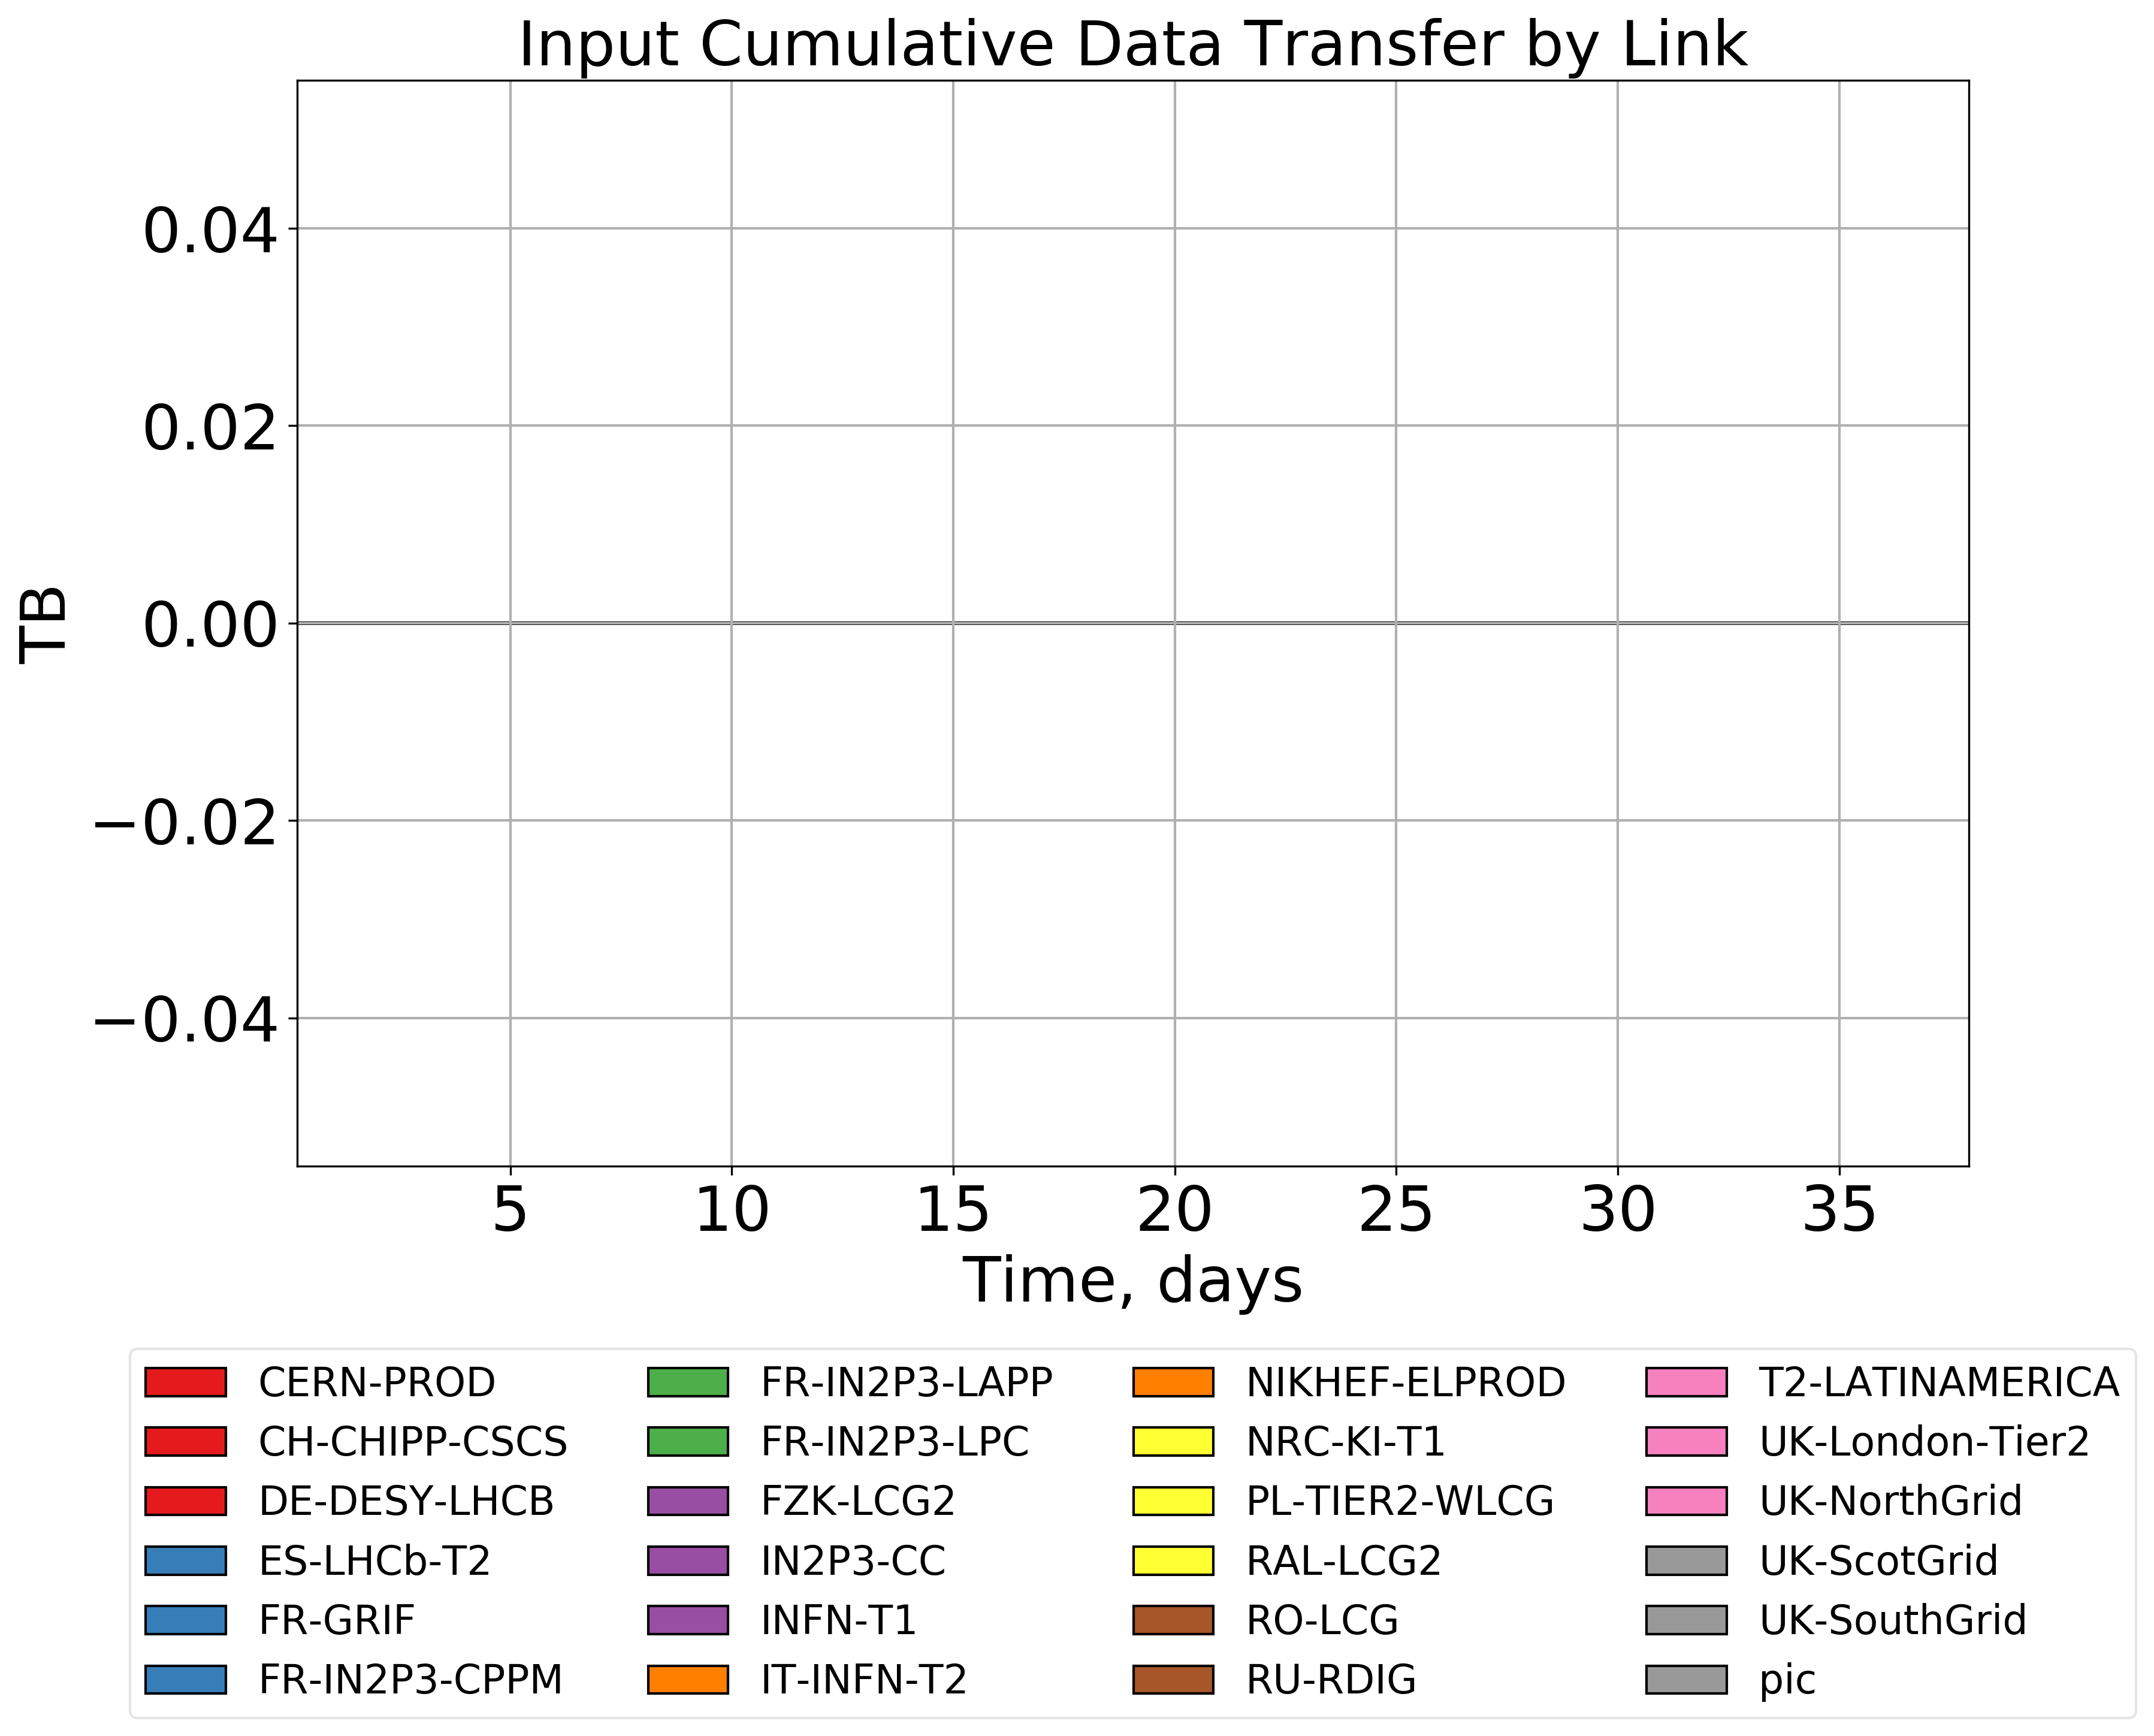

In [29]:
tp.input_cumulative_data_transfer()

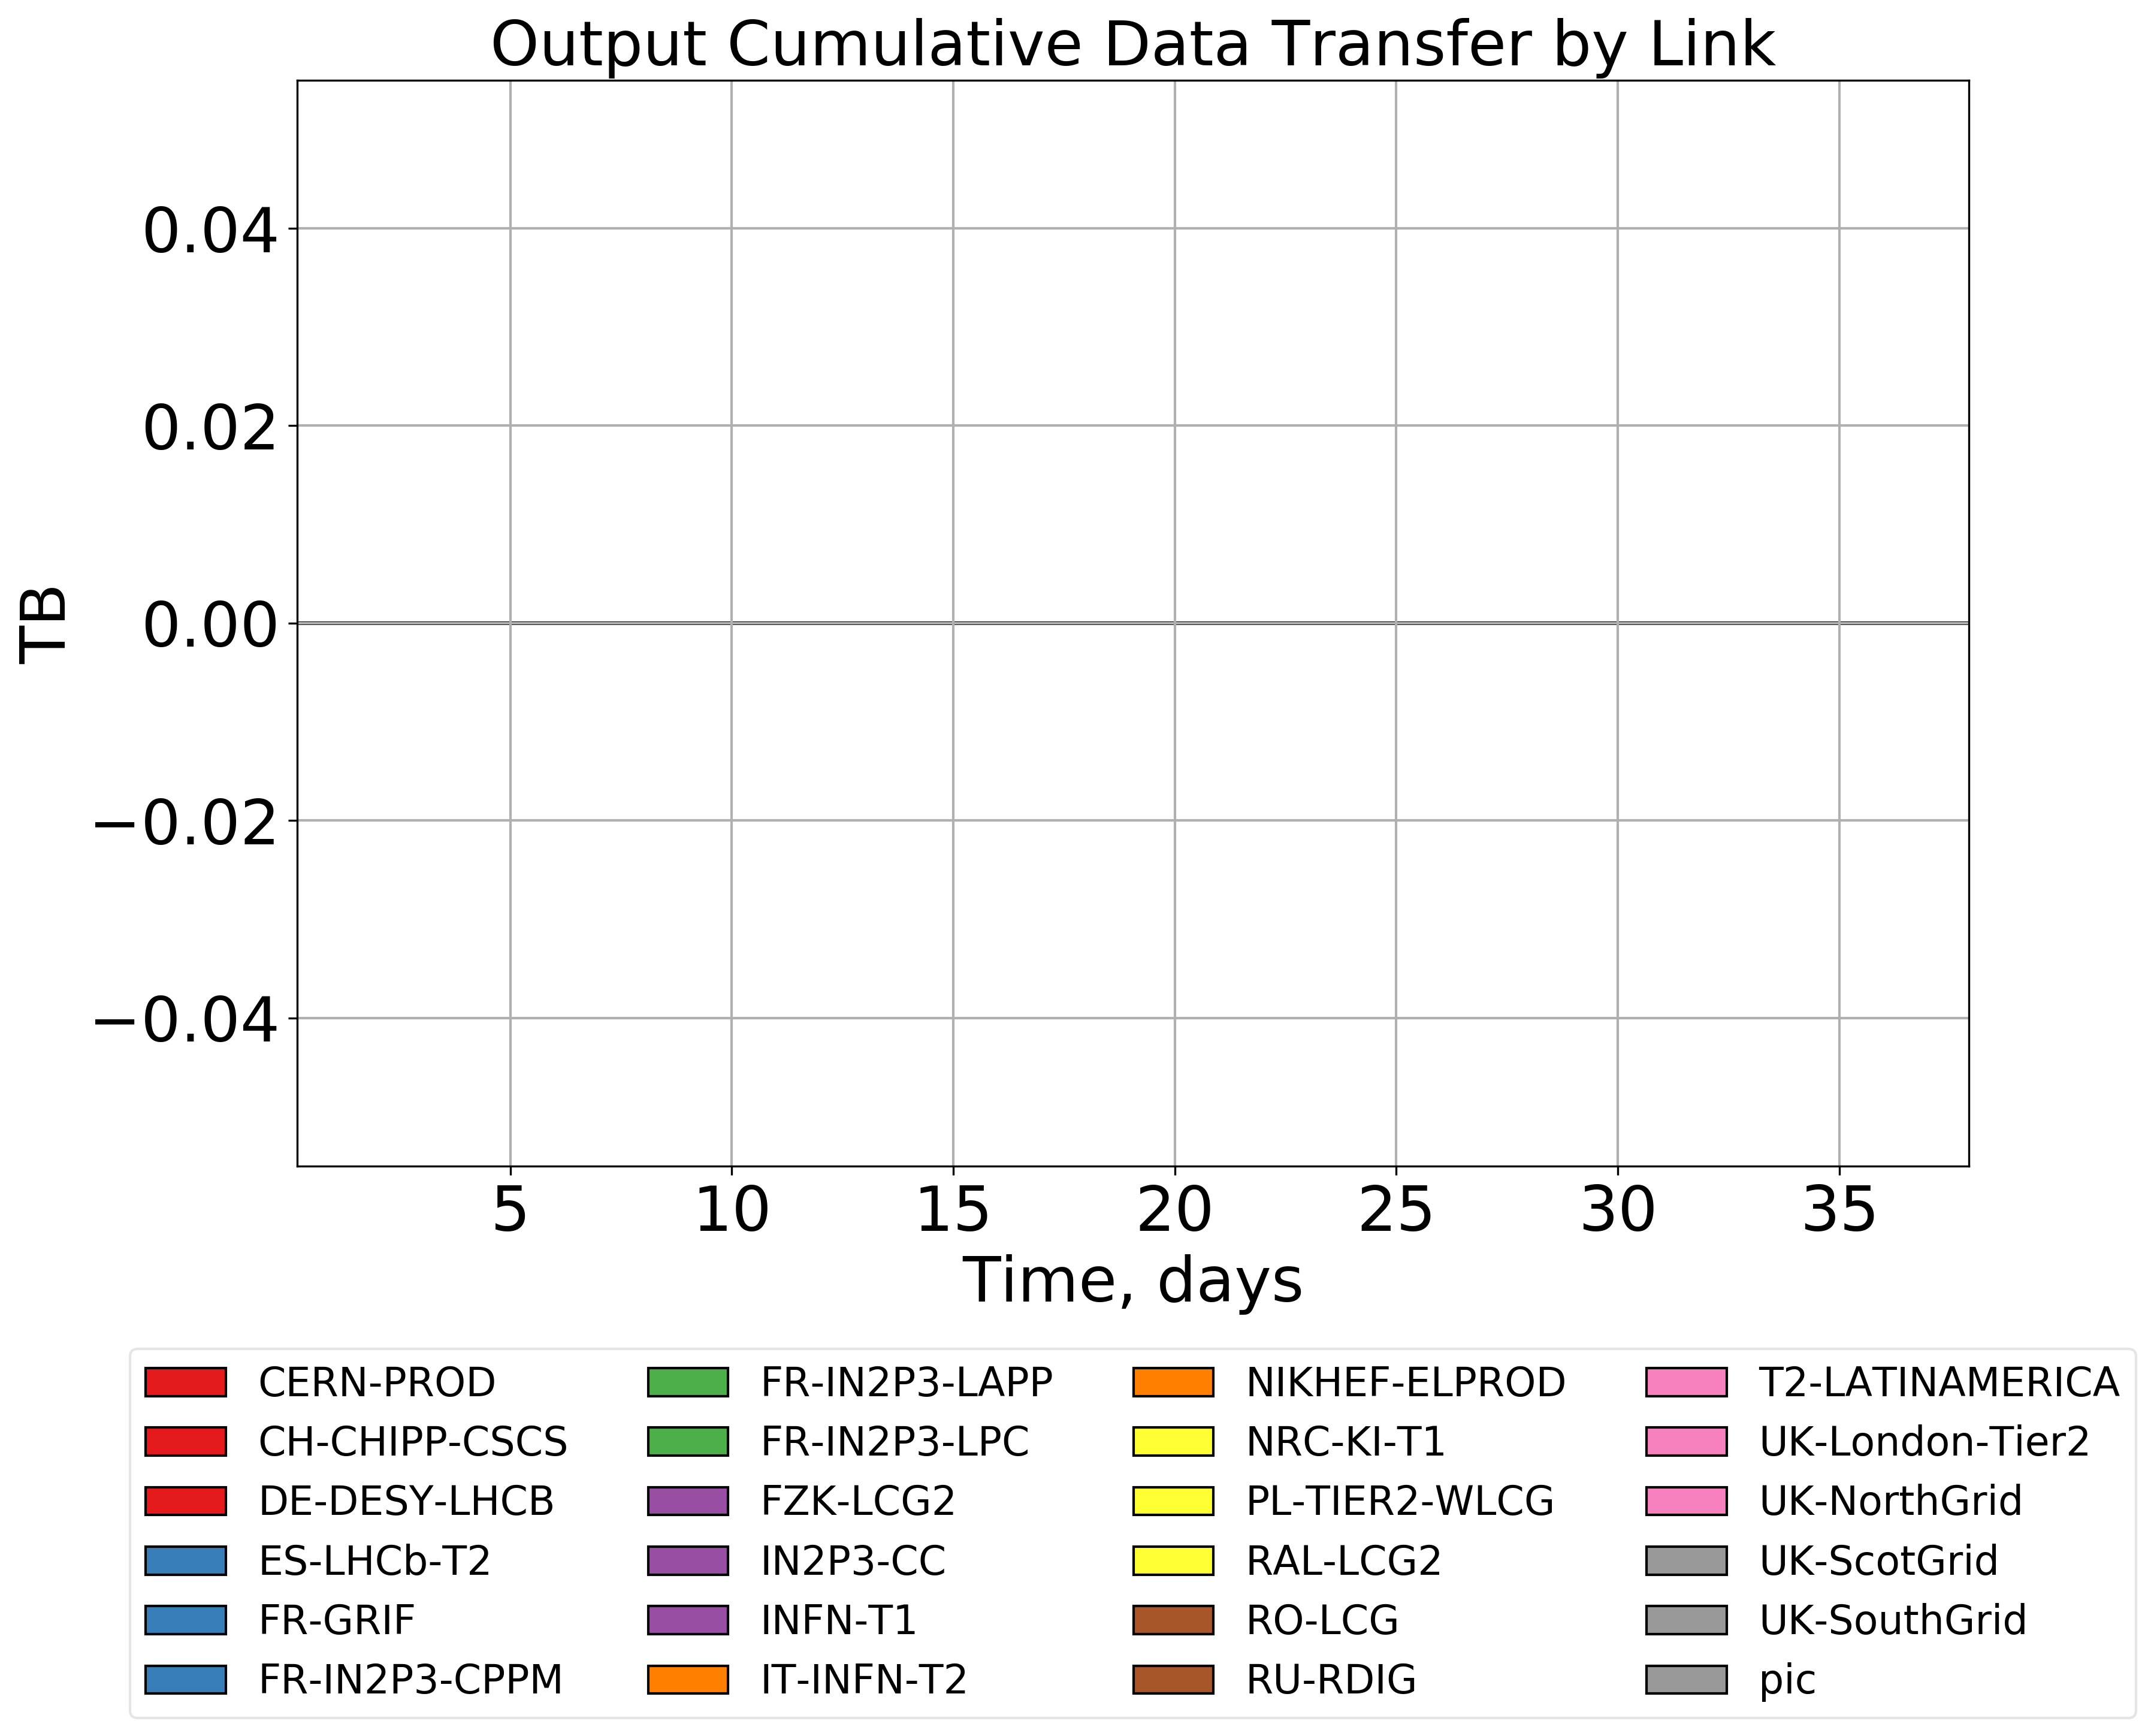

In [30]:
tp.output_cumulative_data_transfer()

# Number of Datasets on Disk/Tape

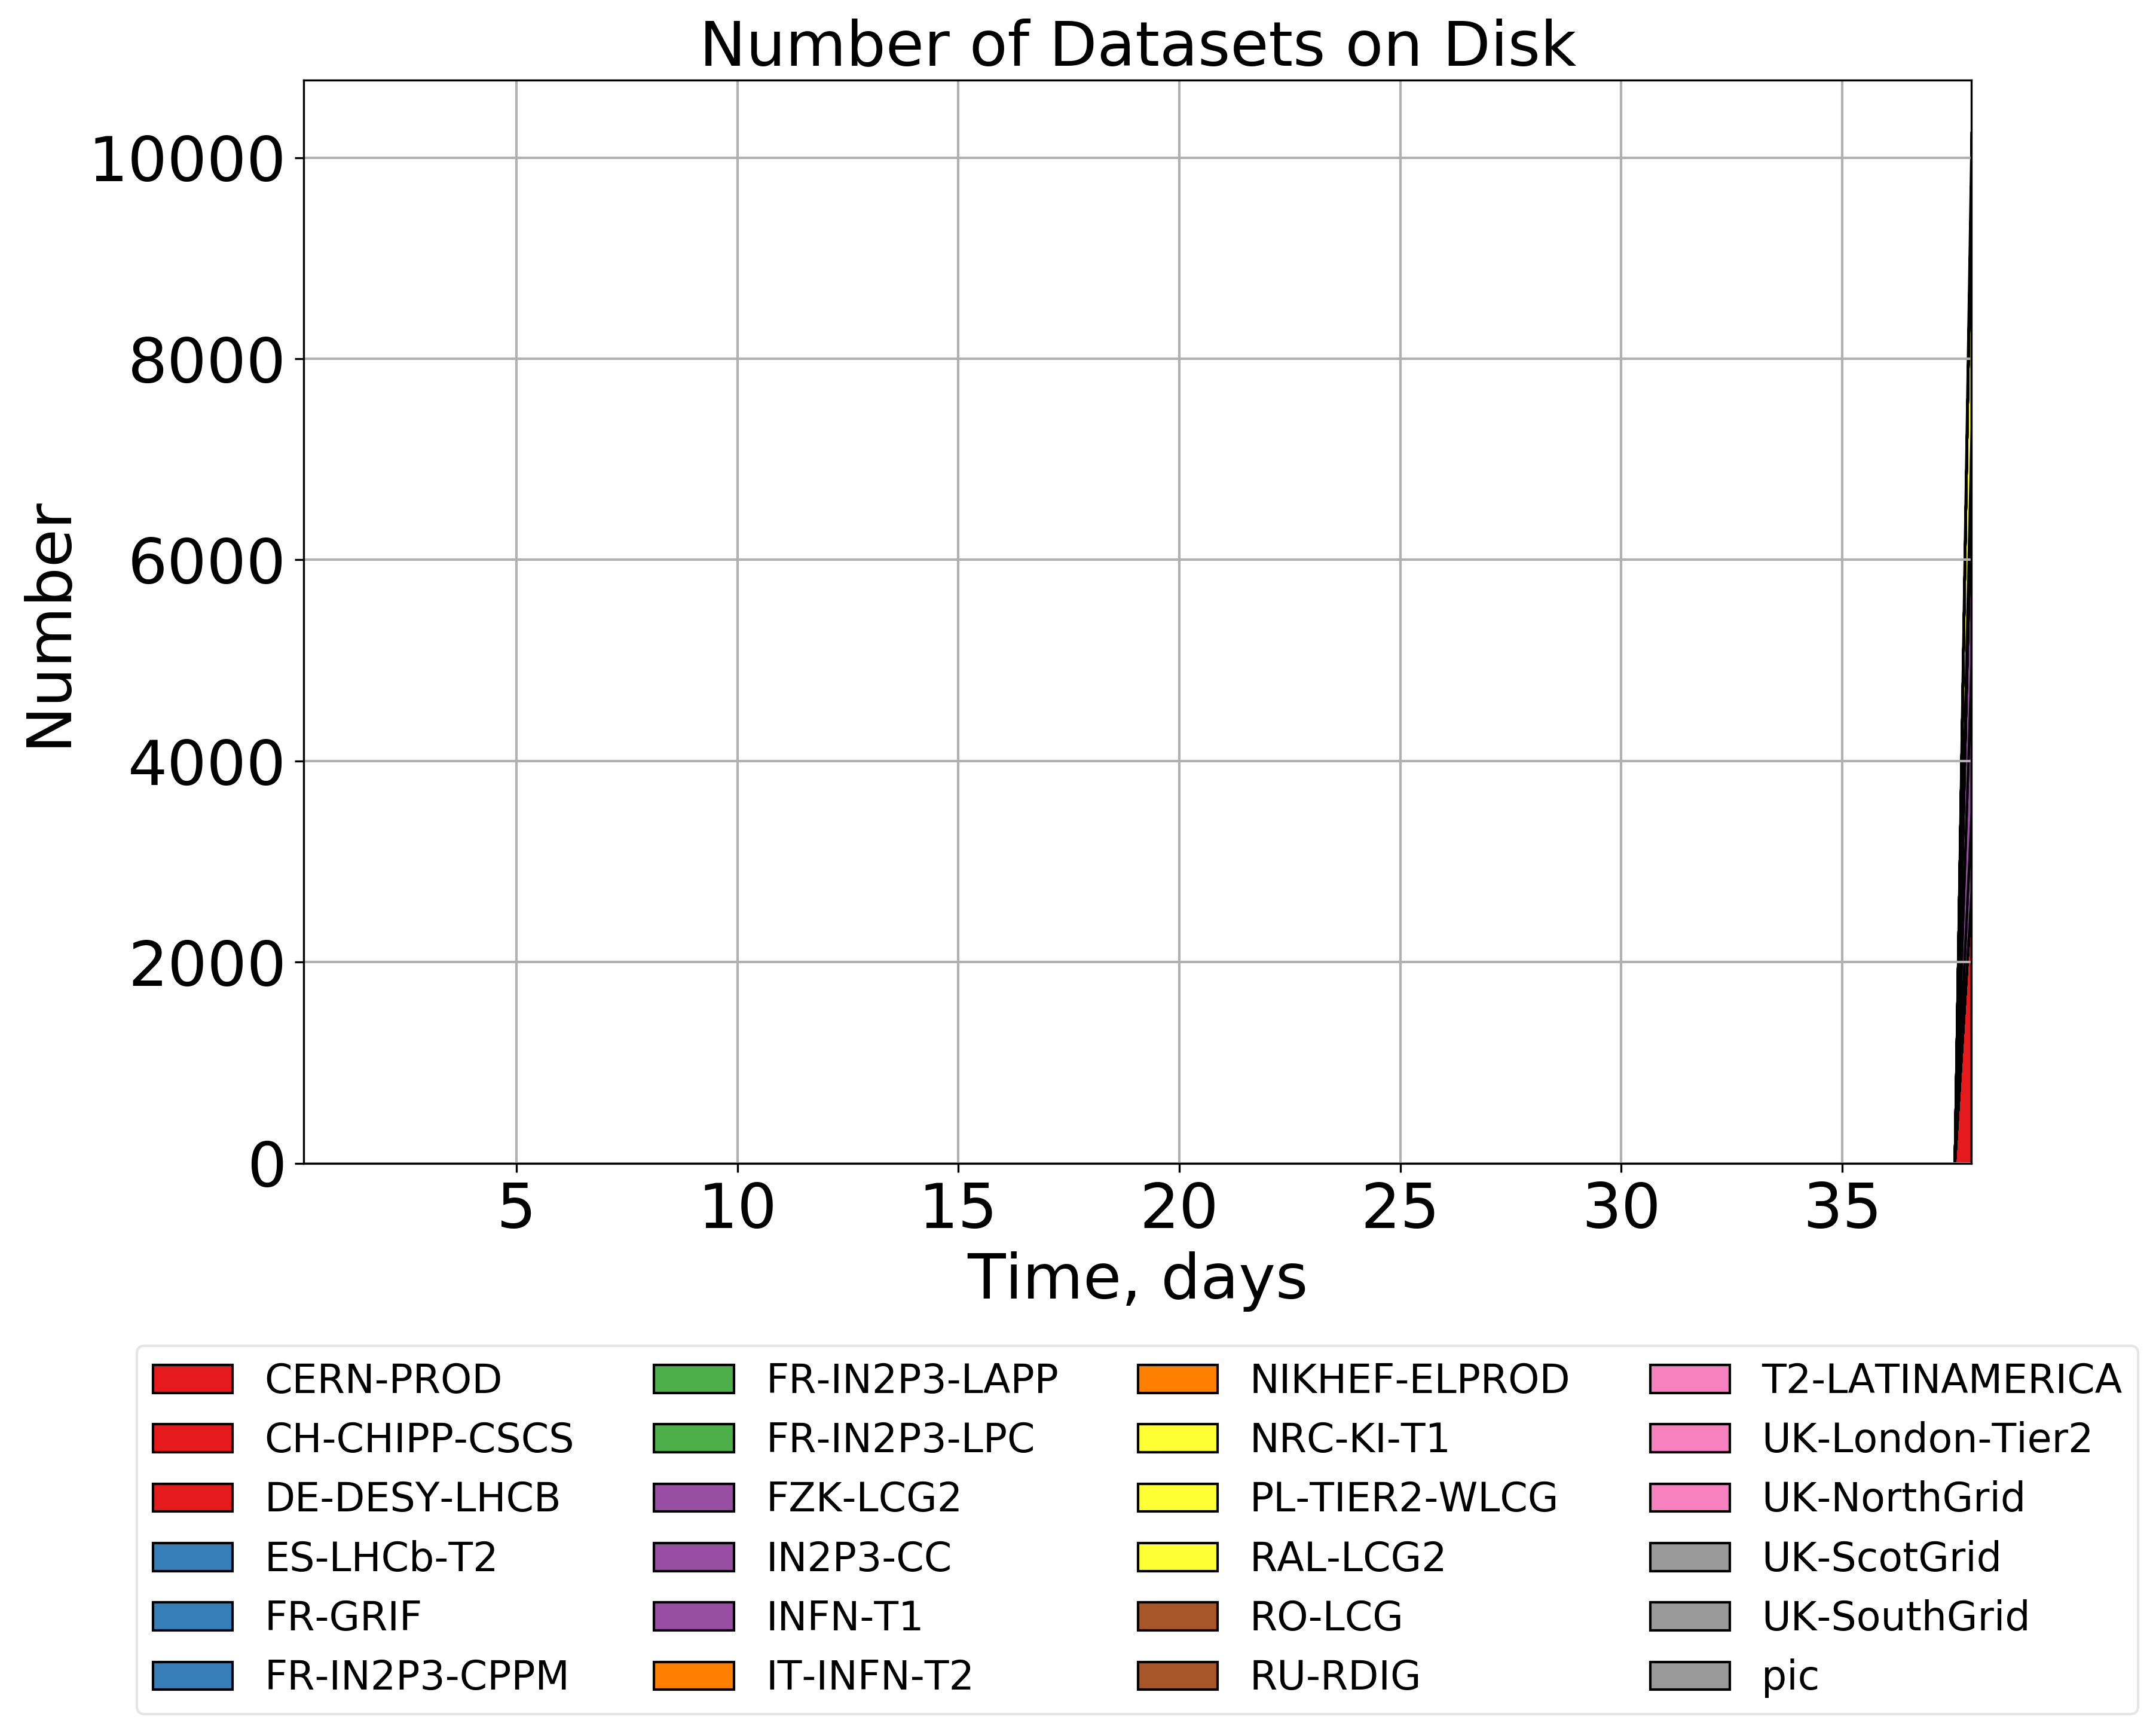

In [31]:
tp.number_of_datasets_ondisk()

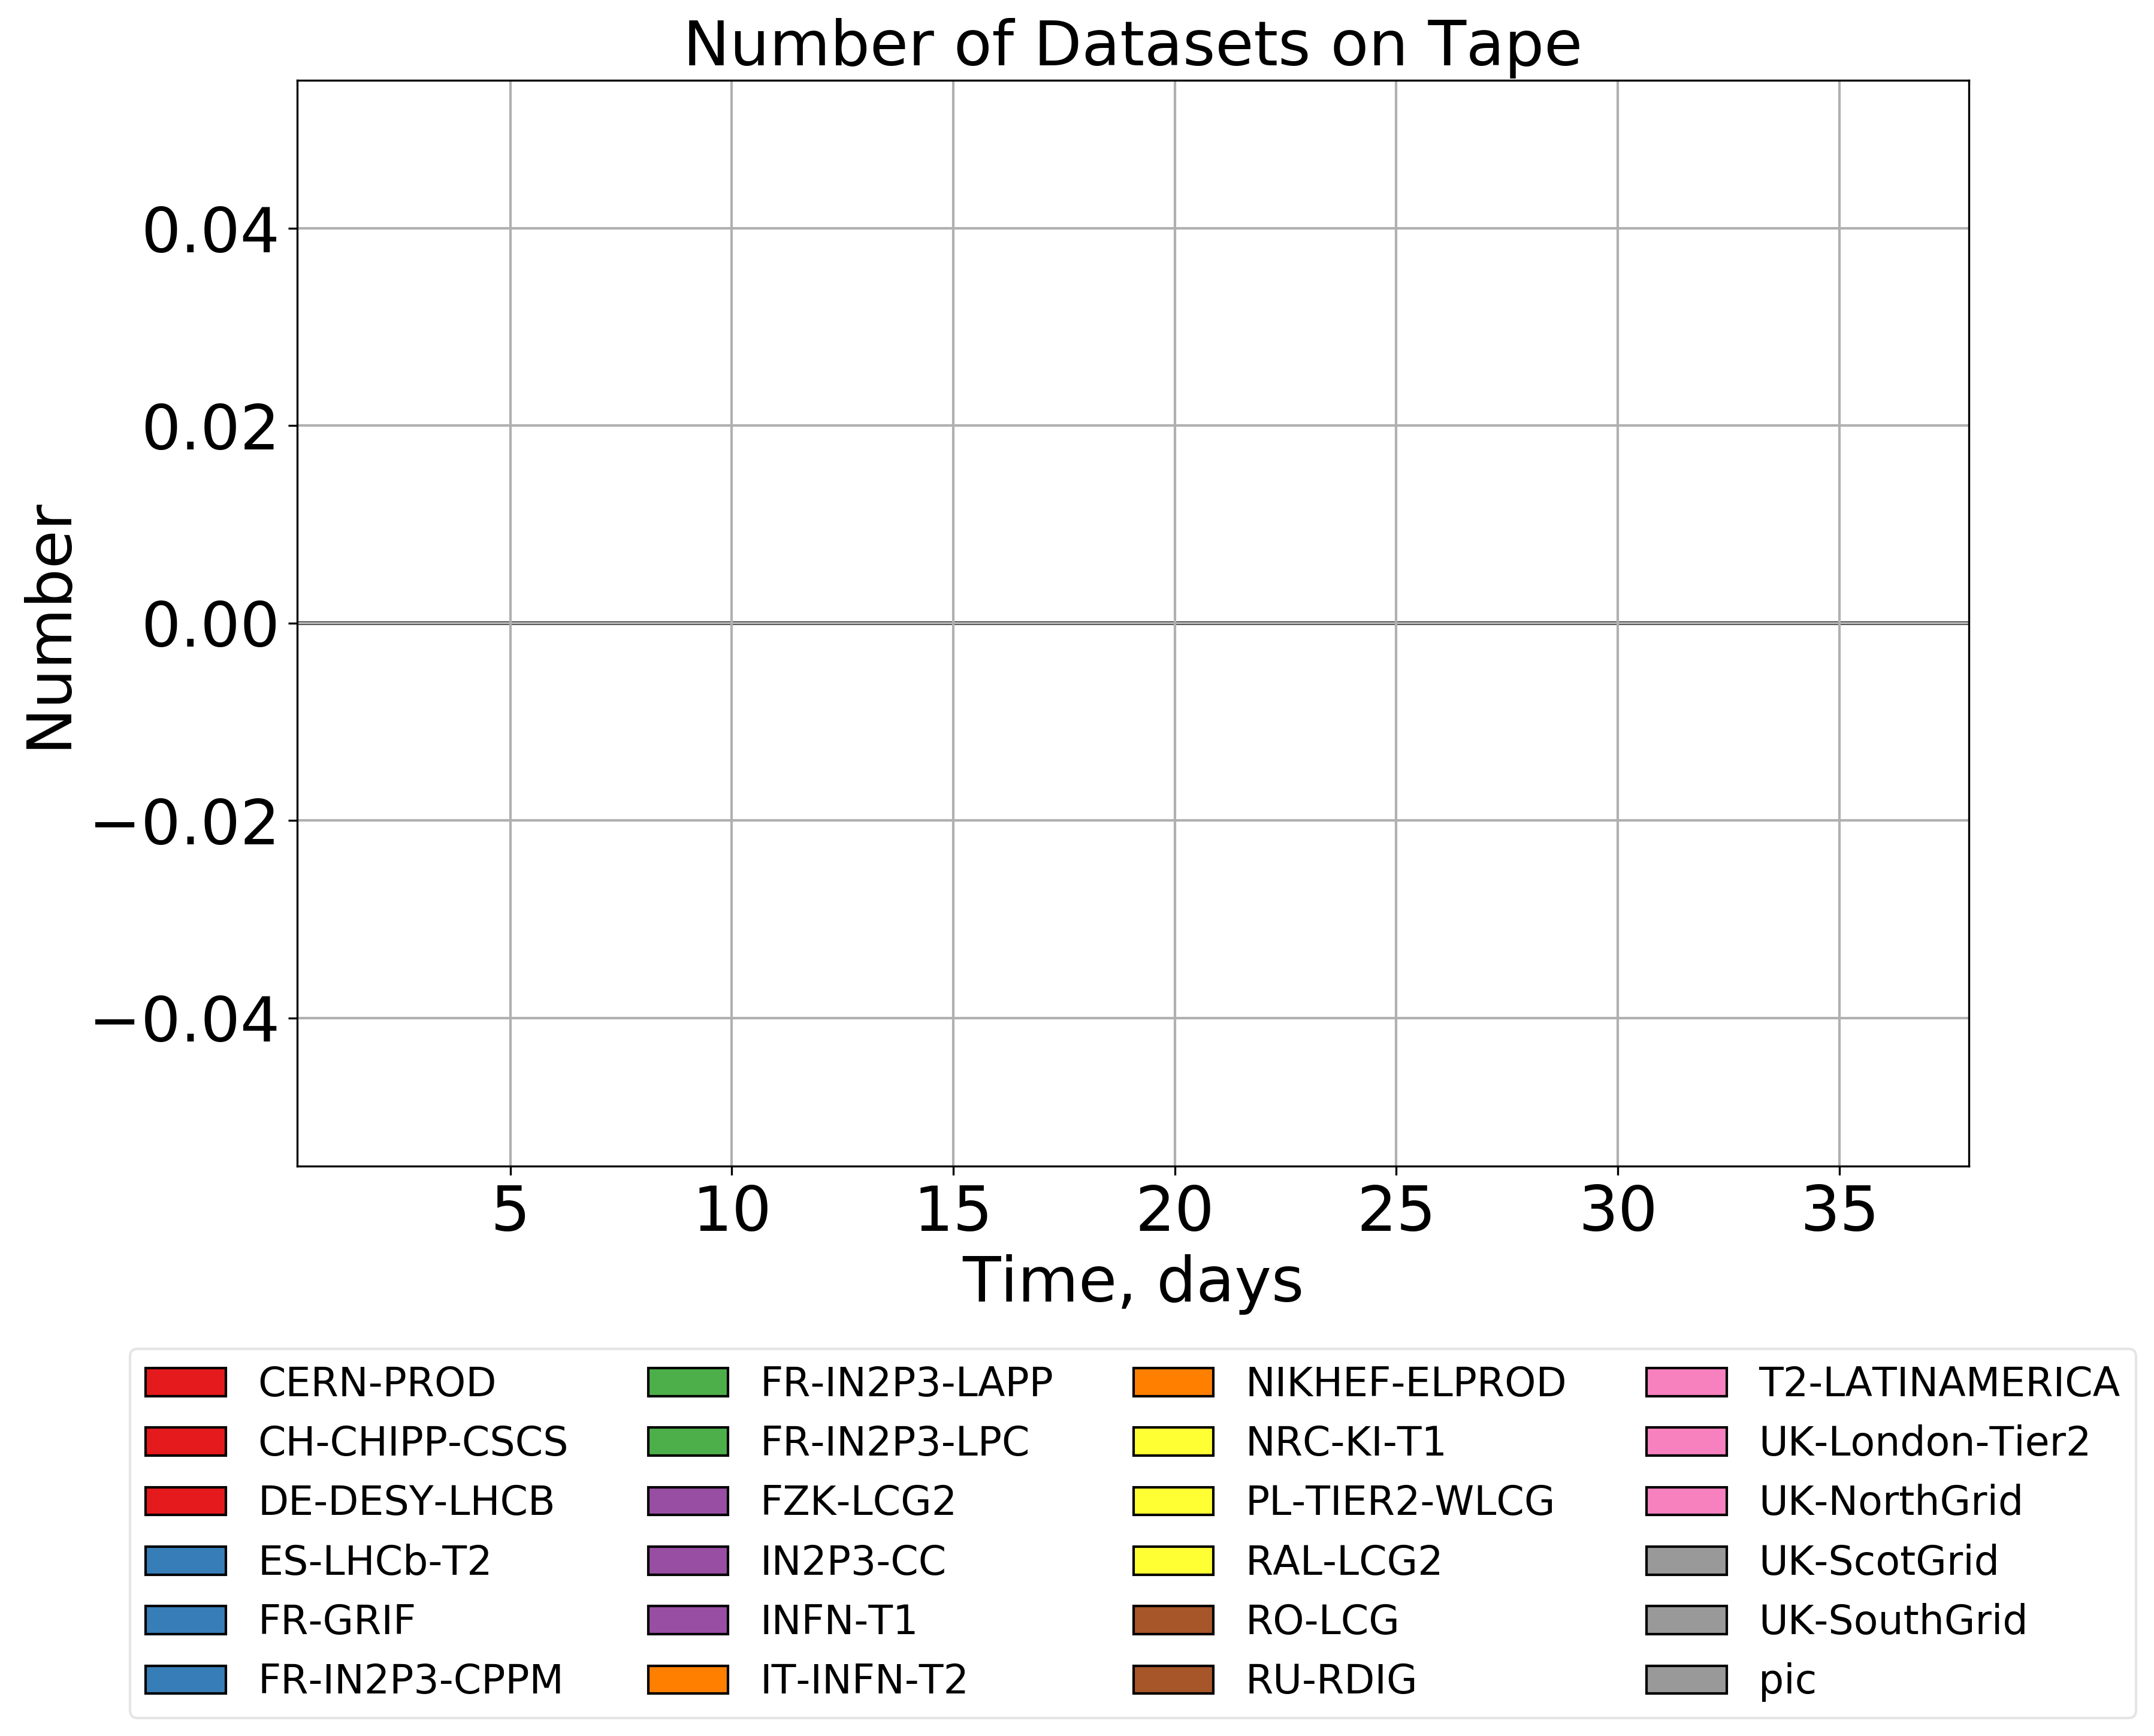

In [32]:
tp.number_of_datasets_ontape()

### Number of Active Cores

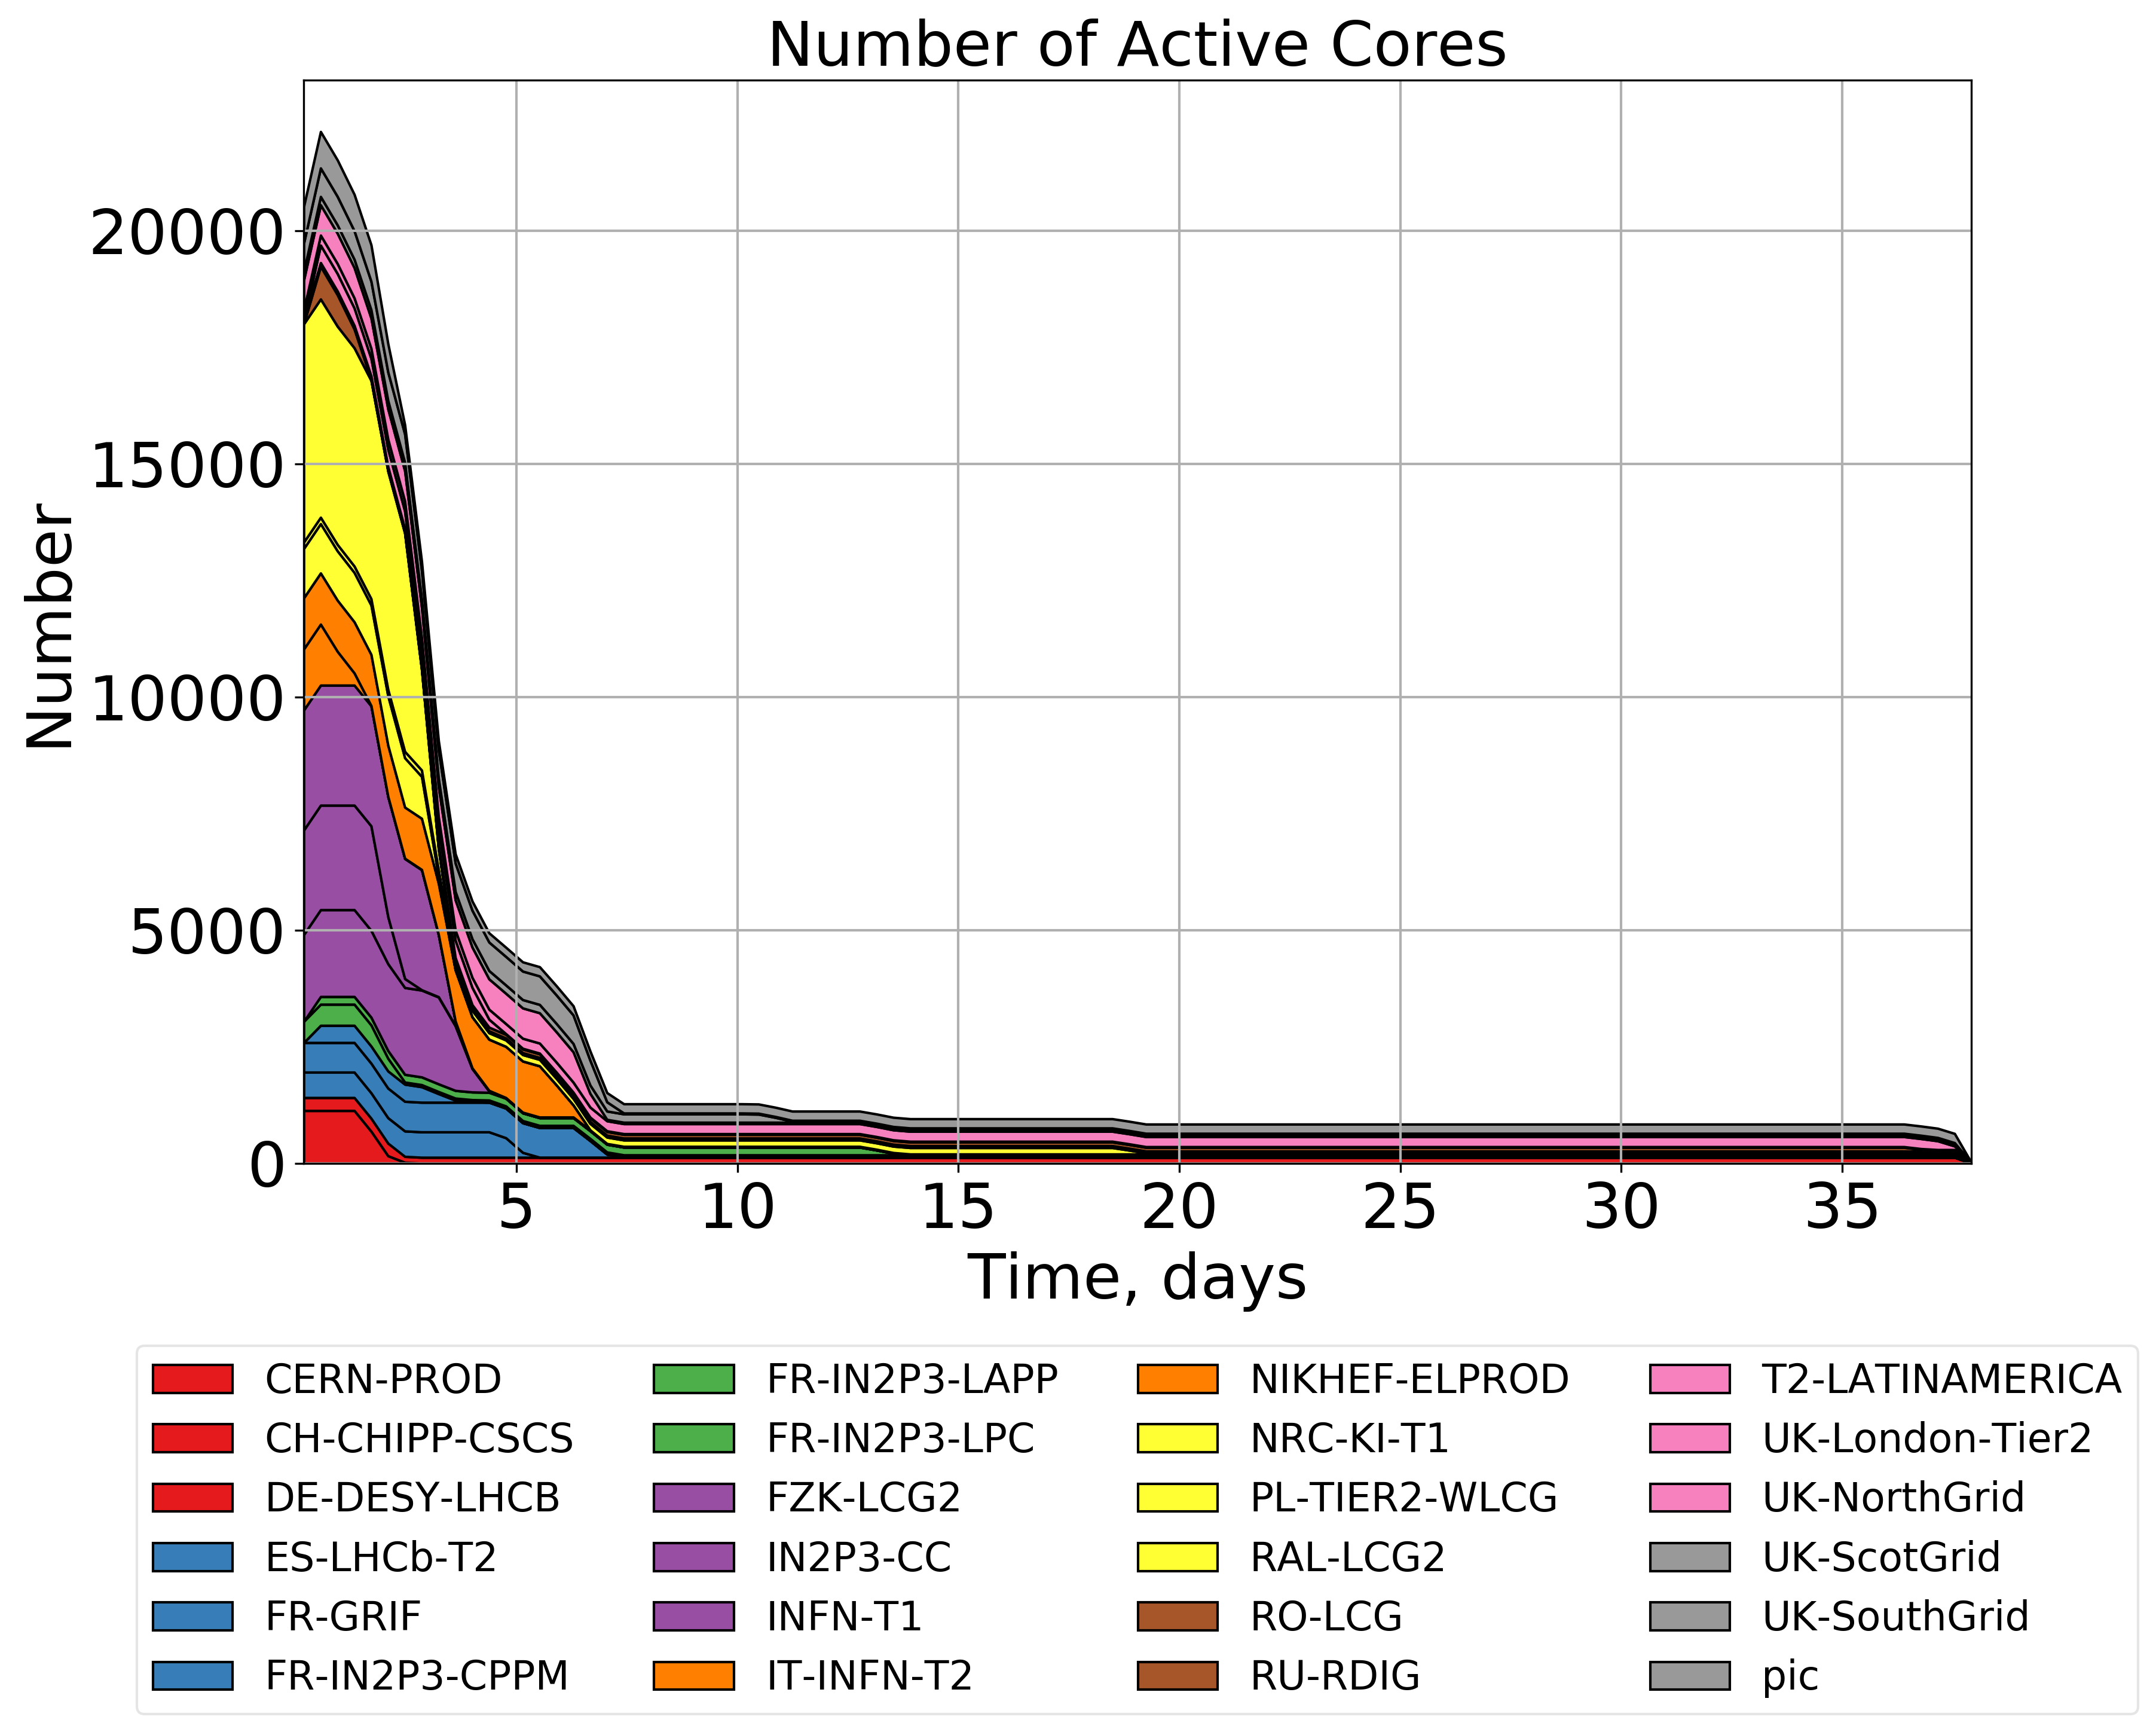

In [33]:
tp.number_of_active_cores()

### Total Data Transfer Plot

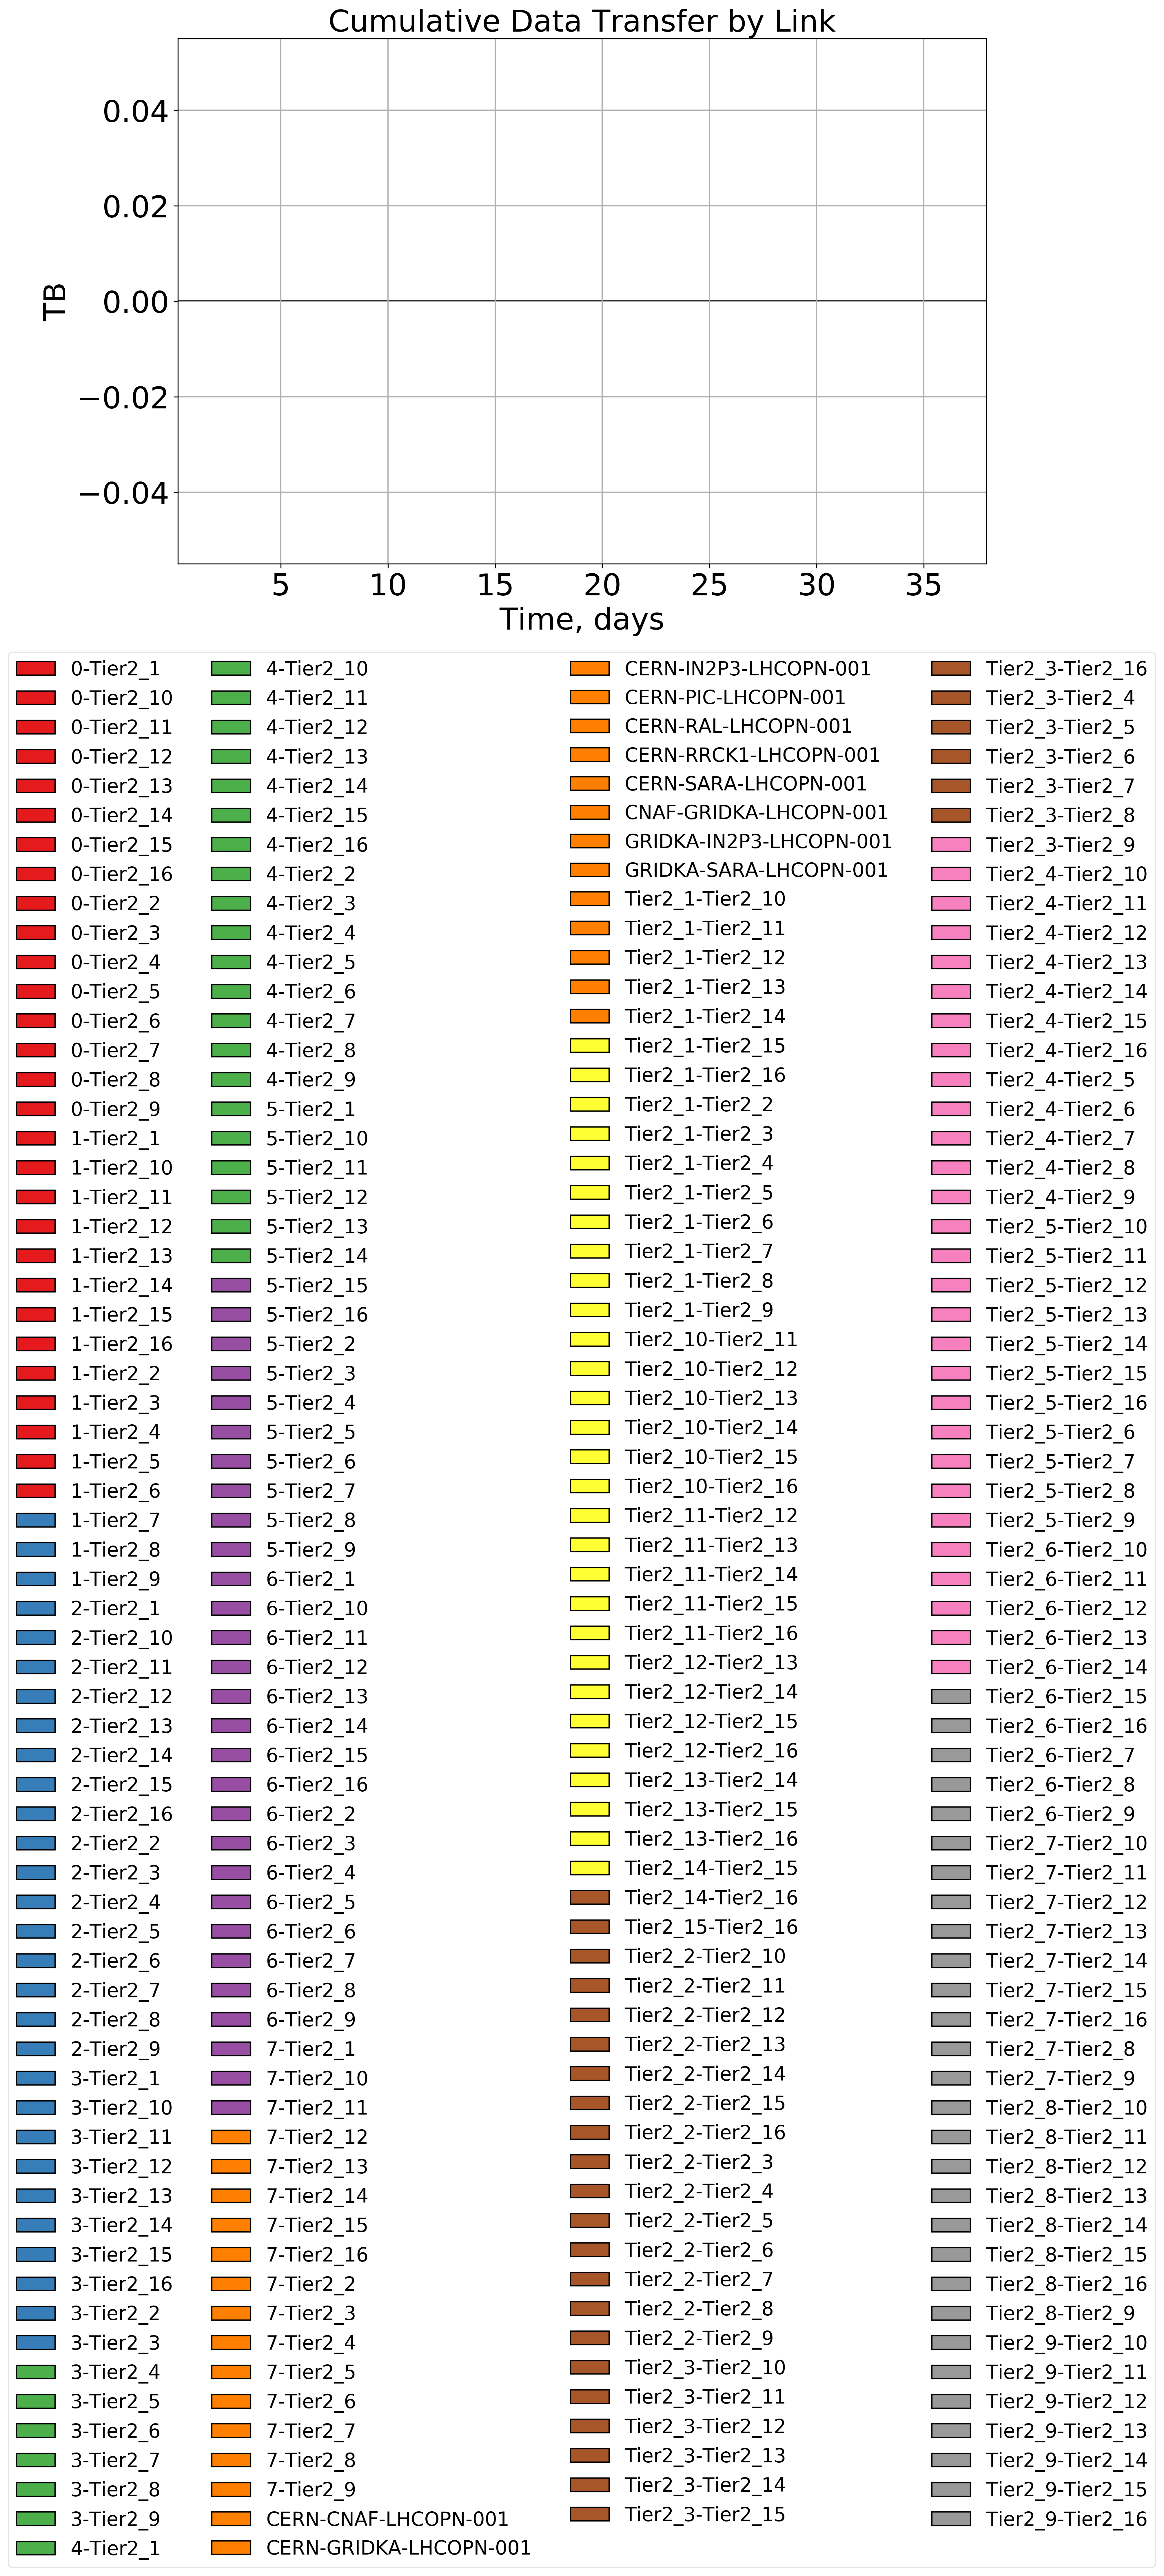

In [97]:
tp.total_cumulative_data_transfer()